<a href="https://colab.research.google.com/github/auroramugnai/Minimum-Exact-Cover-Problem/blob/main/MECP_with-QAOA/QAOA_random_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the MECP with QAOA+ using "Random Parameters" technique

In [1]:
# Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/ICFO_CODICI/progetto/MECP_with-QAOA
# ! pip install -r requirements.txt

## Import Modules & Define Functions

In [7]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *

In [8]:
from datetime import datetime
import math
import random
import time

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from scipy.optimize import minimize
from pprint import pprint # to print dictionaries

In [9]:
def write_params_on_file(DATA_FILE, params):
    DATA_FILE.write("\nChosen parameters:\n")
    DATA_FILE.write(f"Number of layers (p): {params['p']}\n")
    DATA_FILE.write(f"Number of random attempts: {params['random_attempts']}\n")
    DATA_FILE.write(f"Initialization type: {params['init_string']}\n")
    DATA_FILE.write(f"Size (n): {params['n']}\n")
    DATA_FILE.write(f"Chosen instances (chosen_instances): {params['chosen_instances']}\n")
    DATA_FILE.write(f"Choices of k (chosen_ks): {params['chosen_ks']}\n")


    # Display the chosen parameters
    print(f"######### ...Writing on file...: #########")
    print("Chosen parameters:")
    print(f"Number of layers (p): {params['p']}")
    print(f"Number of random attempts: {params['random_attempts']}")
    print(f"Initialization type: {params['init_string']}")
    print(f"Size (n): {params['n']}")
    print(f"Chosen instances (chosen_instances): {params['chosen_instances']}")
    print(f"Choice of ks (chosen_ks): {params['chosen_ks']}")
    print(f"##########################################")

## Set Parameters

In [10]:
### Get parameters from the user
params = get_parameters_from_user()

# Get the parameters separately
chosen_instances = params['chosen_instances']
chosen_ks = params['chosen_ks']
p = params['p']
random_attempts = params['random_attempts']
init_string = params['init_string']

n = params['n']

Number of layers (p), default is 4:  
Number of random attempts, default is 50:  
String initialization (all1 or all0), default is all0:  
Size n (6, 8, 10), default is 6:  
Chosen instances, default is [1, ..., 10] (Give a list please!):  [1,2,3,4]
Choice for L, to compute k as L/(min_length * n). Give a list specifying L for every instance chosen please. [12,12,12,12]


## For Every Instance Chosen, Do the Minimization
This code iterates through selected instances, generating corresponding subsets and computing the spectrum of states, including Minimum Exact Cover (MEC) states. It then builds the quantum circuits for the QAOA+ algorithm, including cost, mixing, and initialization circuits. Initial angles (betas and gammas) are randomly set within specified bounds, and the QAOA+ algorithm is run for multiple random initializations to minimize energy. Results, such as the optimal parameters, best attempt, minimum energy, and elapsed time, are recorded. Final data of each instance is saved in a .csv and a .txt.



Saving in folder_path = random_parameters_2025-07-23@10h37m20s
1.0 1
**************************************************
Instance 1 with h = 1.0

U, subsets, EXACT_COVERS, MEC {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} [{9, 6}, {9, 10, 6, 1}, {12, 5}, {10, 2, 3, 4}, {8, 1, 11, 7}, {2, 3, 4, 5, 7, 8, 11, 12}] ['010001', '101110'] ['010001']


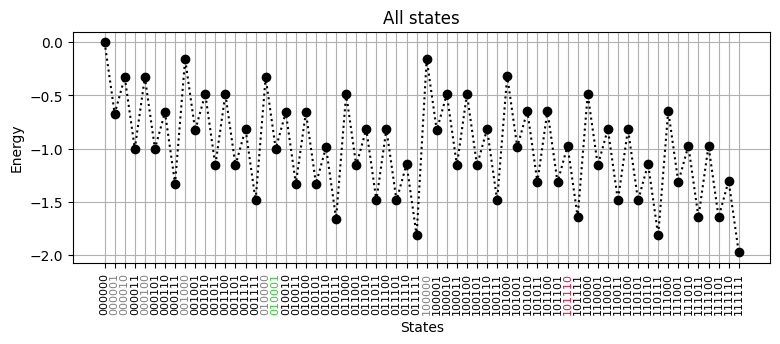

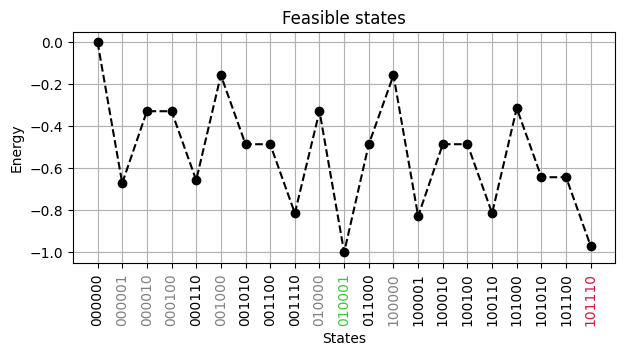

Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 7}
  6: {2, 3, 4, 5, 7, 8, 11, 12}
num_max_ctrl: 3
NUM_ANC: 2
QC_DIM: 8
A = 1.0285714285714285
B = 0.04285714285714286
constant = -A + B = -0.9857142857142857

hamiltonian:
 SparsePauliOp(['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII'],
              coeffs=[0.07857143+0.j, 0.16428571+0.j, 0.07857143+0.j, 0.16428571+0.j,
 0.16428571+0.j, 0.33571429+0.j])
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 7}
  6: {2, 3, 4, 5, 7, 8, 11, 12}
num_max_ctrl: 3
NUM_ANC: 2
QC_DIM: 8
Mixing circuit created for instance 1 with 6 qubits.
Circuit dimension (QC_DIM): 8
Number of ancillas: 2
Number of control gates: 3
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {9, 6}
  2: {9, 10, 6, 1}
  3: {12, 5}
  4: {10, 2, 3, 4}
  5: {8, 1, 11, 

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9714285714285714
E_min = result.fun = 0.014285714285714235

Optimal parameters: betas, gammas = [3.1415926747201697, 0.027111936088599624, 6.256073365747588, 6.283185276851661], [-5.230537791788883, -9.096345995961745, -2.0322076399876854e-06, 9.660250993999075]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_4of50
0  101110             1024

---------- 5/50 random_attempts -----------

pars_0 = [3.7617833531279237, 1.6457029626462392, 4.11123134127726, 3.5921541393376826, 2.7905360936753425, -2.7830797999339607, 1.4593451483527797, -8.39589977227357]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]



/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7582360949278789
E_min = result.fun = 0.22747819078640674

Optimal parameters: betas, gammas = [4.279753715224702, 3.7294420927916154, 1.5877050228618326, 2.8847679409534512], [4.18456019153939, 0.9247691222539665, -1.6754794439364842, -9.995976625058432]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_5of50
13  100001              267
1   000001              250
10  010001              130
16  100110              123
11  011000               53
20  101110               44
8   001110               26
7   001100               25
6   001010               24
4   000110               18
18  101010               15
19  101100               14
9   010000               11
0   000000                9
3   000100                3
15  100100                3
17  101000                3
14  100010                2
2   000010                2
5   001000                1
12  100000                1

---------- 6/50 random_attempts -----------

pars_0

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8788697510633661
E_min = result.fun = 0.10684453465091956

Optimal parameters: betas, gammas = [3.8954072990178954, 2.1488698361513228, 4.336977651610692, 3.466297802453344], [0.28525661332070773, 9.995976624999997, -7.346030412195678, -8.295776525917683]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_7of50
10  010001              576
13  100001              115
16  100110               97
20  101110               72
11  011000               42
4   000110               35
1   000001               18
9   010000               16
7   001100               12
0   000000                7
6   001010                6
8   001110                5
15  100100                5
5   001000                4
17  101000                4
3   000100                2
14  100010                2
2   000010                2
19  101100                2
18  101010                1
12  100000                1

---------- 8/50 random_attempts -----------

pars_0

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9065378790781653
E_min = result.fun = 0.07917640663612041

Optimal parameters: betas, gammas = [1.3618747199538797, 2.6621885605379796, 4.872696681553638, 0.1837825559925505], [-8.275008864741341, 5.263024628818661, 5.2886920056299465, 3.758967210814227]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_8of50
15  101110              824
6   010001               45
9   100001               44
4   001110               24
3   001100               17
10  100010               14
12  101000               13
2   001010               12
7   011000                8
11  100100                7
1   001000                4
13  101010                4
5   010000                3
8   100000                2
14  101100                2
0   000110                1

---------- 9/50 random_attempts -----------

pars_0 = [3.10181662599361, 4.0473578746949075, 4.3296191641933275, 4.476866857185411, -9.465454479233111, -7.0239571565236885, 9.070707816893808, 

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7686967646963705
E_min = result.fun = 0.21701752101791513

Optimal parameters: betas, gammas = [4.497864342329088, 5.093244875018815, 3.2491853203553758, 6.016213932580177], [-2.3000340133691255, 0.6502764651330213, -0.8581144067175759, -7.379786734075564]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_17of50
11  100001               404
14  100110               166
1   000001               117
18  101110               100
17  101100                53
16  101010                40
7   001110                37
15  101000                31
8   010001                17
4   000110                11
12  100010                 9
9   011000                 7
6   001100                 7
10  100000                 5
13  100100                 5
5   001010                 5
2   000010                 5
3   000100                 3
0   000000                 2

---------- 18/50 random_attempts -----------

pars_0 = [0.22288062399535466, 0.4791032

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9398743180096052
E_min = result.fun = 0.04583996770468052

Optimal parameters: betas, gammas = [2.149926025760017, 4.23492075144839, 5.082194709095985, 1.0881390835084912], [1.5076949322960855, -0.38057874212818055, -2.8262962111695087, 9.995973185920025]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_20of50
9   010001               808
12  100001               103
15  100110                20
4   000110                20
8   001110                10
0   000000                10
5   001000                 8
16  101000                 8
18  101110                 7
14  100100                 6
13  100010                 5
2   000010                 5
1   000001                 4
3   000100                 3
10  011000                 2
17  101100                 2
6   001010                 1
7   001100                 1
11  100000                 1

---------- 21/50 random_attempts -----------

pars_0 = [5.302320359758282, 5.3138353297

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8549426859799151
E_min = result.fun = 0.13077159973437058

Optimal parameters: betas, gammas = [4.941377034835763, 6.283185307179572, 1.513755250763237, 0.815014239042248], [6.795865107138231, -3.979430484808926, 3.9794302611630488, 6.653745468758671e-08]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_21of50
7   010001               566
10  100001               250
13  100110                50
9   100000                48
14  101000                33
16  101110                15
11  100010                11
8   011000                11
12  100100                10
0   000000                10
1   000001                 7
3   000110                 7
5   001110                 2
6   010000                 1
4   001000                 1
2   000010                 1
15  101010                 1

---------- 22/50 random_attempts -----------

pars_0 = [0.28822160744465763, 4.300265677051765, 4.622477875428175, 5.601028350898131, 2.063894514

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7468576543497385
E_min = result.fun = 0.2388566313645472

Optimal parameters: betas, gammas = [5.523913706061336, 4.0342306700301656, 2.2636723429224874, 4.8601542473653545], [9.906352326016755, -9.995976625058432, -0.6558630122943292, 8.934809532827508]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_25of50
7   001110               253
12  100001               183
9   010001               139
4   000110               122
19  101110                95
10  011000                60
13  100010                32
14  100100                27
5   001000                21
3   000100                19
11  100000                17
1   000001                11
2   000010                11
8   010000                10
15  100110                 6
16  101000                 6
17  101010                 6
0   000000                 3
18  101100                 2
6   001010                 1

---------- 26/50 random_attempts -----------

pars_0 = [2.4

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8973210859787408
E_min = result.fun = 0.08839319973554485

Optimal parameters: betas, gammas = [1.9297395646799218, 2.0809752372673582, 2.23275934758124, 0.923471050685418], [-9.979716112213861, -8.69062285414758, 0.737767835312783, 3.54025804119665]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_26of50
5   010001               393
14  101110               269
10  100110               179
1   000001               100
7   100001                49
6   011000                 6
3   001110                 5
8   100010                 5
9   100100                 5
12  101010                 4
0   000000                 2
2   000110                 2
4   010000                 2
13  101100                 2
11  101000                 1

---------- 27/50 random_attempts -----------

pars_0 = [0.7951123592204424, 2.0280399112170104, 2.2056142838454065, 0.8239415901591122, 7.670623785763851, -0.8886464555663132, 9.933156010463083, 7.98143442371

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7931345710405384
E_min = result.fun = 0.19257971467374718

Optimal parameters: betas, gammas = [3.2188302759022633, 3.9880026424098975, 0.7294902777163119, 1.0839636523944804], [6.598980049634569, -8.096784437370772, -7.634218179241614, 2.0195333703703735]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_37of50
10  100001               429
17  101110               192
7   010001               125
13  100110                53
1   000001                32
11  100010                30
6   001110                29
12  100100                28
14  101000                21
9   100000                19
15  101010                15
16  101100                15
4   000110                13
5   001000                 8
8   011000                 5
3   000100                 4
0   000000                 4
2   000010                 2

---------- 38/50 random_attempts -----------

pars_0 = [0.024830846915471588, 0.32277013877310856, 1.94682633959880

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8547253385747027
E_min = result.fun = 0.13098894713958298

Optimal parameters: betas, gammas = [5.110549991779486, 5.98444396697009, 1.7073005908465153, 5.778948384924151], [-9.995976625058432, -9.995945539327195, 9.666237522146076, 9.754191718136838]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_39of50
6   010001               523
9   100001               171
12  100110               127
0   000001                40
8   100000                33
15  101110                31
7   011000                23
11  100100                20
10  100010                14
2   000110                12
3   001000                10
13  101000                 8
4   001110                 6
5   010000                 4
1   000010                 1
14  101100                 1

---------- 40/50 random_attempts -----------

pars_0 = [0.41198964143616457, 2.4797341592538356, 3.272341461721035, 6.1762710796278775, -2.187184720541647, 9.862815784869206, 4.8

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.800052105406948
E_min = result.fun = 0.18566218030733764

Optimal parameters: betas, gammas = [4.294764410257422, 3.1403423999815274, 1.8967021550570315, 2.308551613881792], [-9.970314305487289, -3.468691806080246, -0.6499440489363941, 6.0928103948436]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_43of50
13  100001               367
16  100110               166
8   001110               164
10  010001               111
1   000001                60
17  101110                38
4   000110                32
2   000010                25
0   000000                18
3   000100                14
12  100000                 7
7   001100                 5
15  100100                 5
9   010000                 4
6   001010                 3
5   001000                 2
14  100010                 2
11  011000                 1

---------- 44/50 random_attempts -----------

pars_0 = [2.0547332317884286, 3.6207769955189364, 3.0074453680798374, 4.2

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7672131725972879
E_min = result.fun = 0.21850111311699771

Optimal parameters: betas, gammas = [2.0984469985872387, 3.483498142799861, 4.083953080456277, 3.6579188314530917], [-0.35454331147084983, 6.696649775468824, 9.995976625058432, 0.42844734665013695]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_44of50
1   000001               305
8   010001               255
14  100110               122
9   011000               115
7   001110                78
4   000110                38
11  100001                35
17  101100                18
18  101110                17
13  100100                 8
16  101010                 6
2   000010                 6
3   000100                 5
12  100010                 4
10  100000                 3
5   001000                 3
15  101000                 3
0   000000                 2
6   001010                 1

---------- 45/50 random_attempts -----------

pars_0 = [4.4083739001814575, 3.93817402

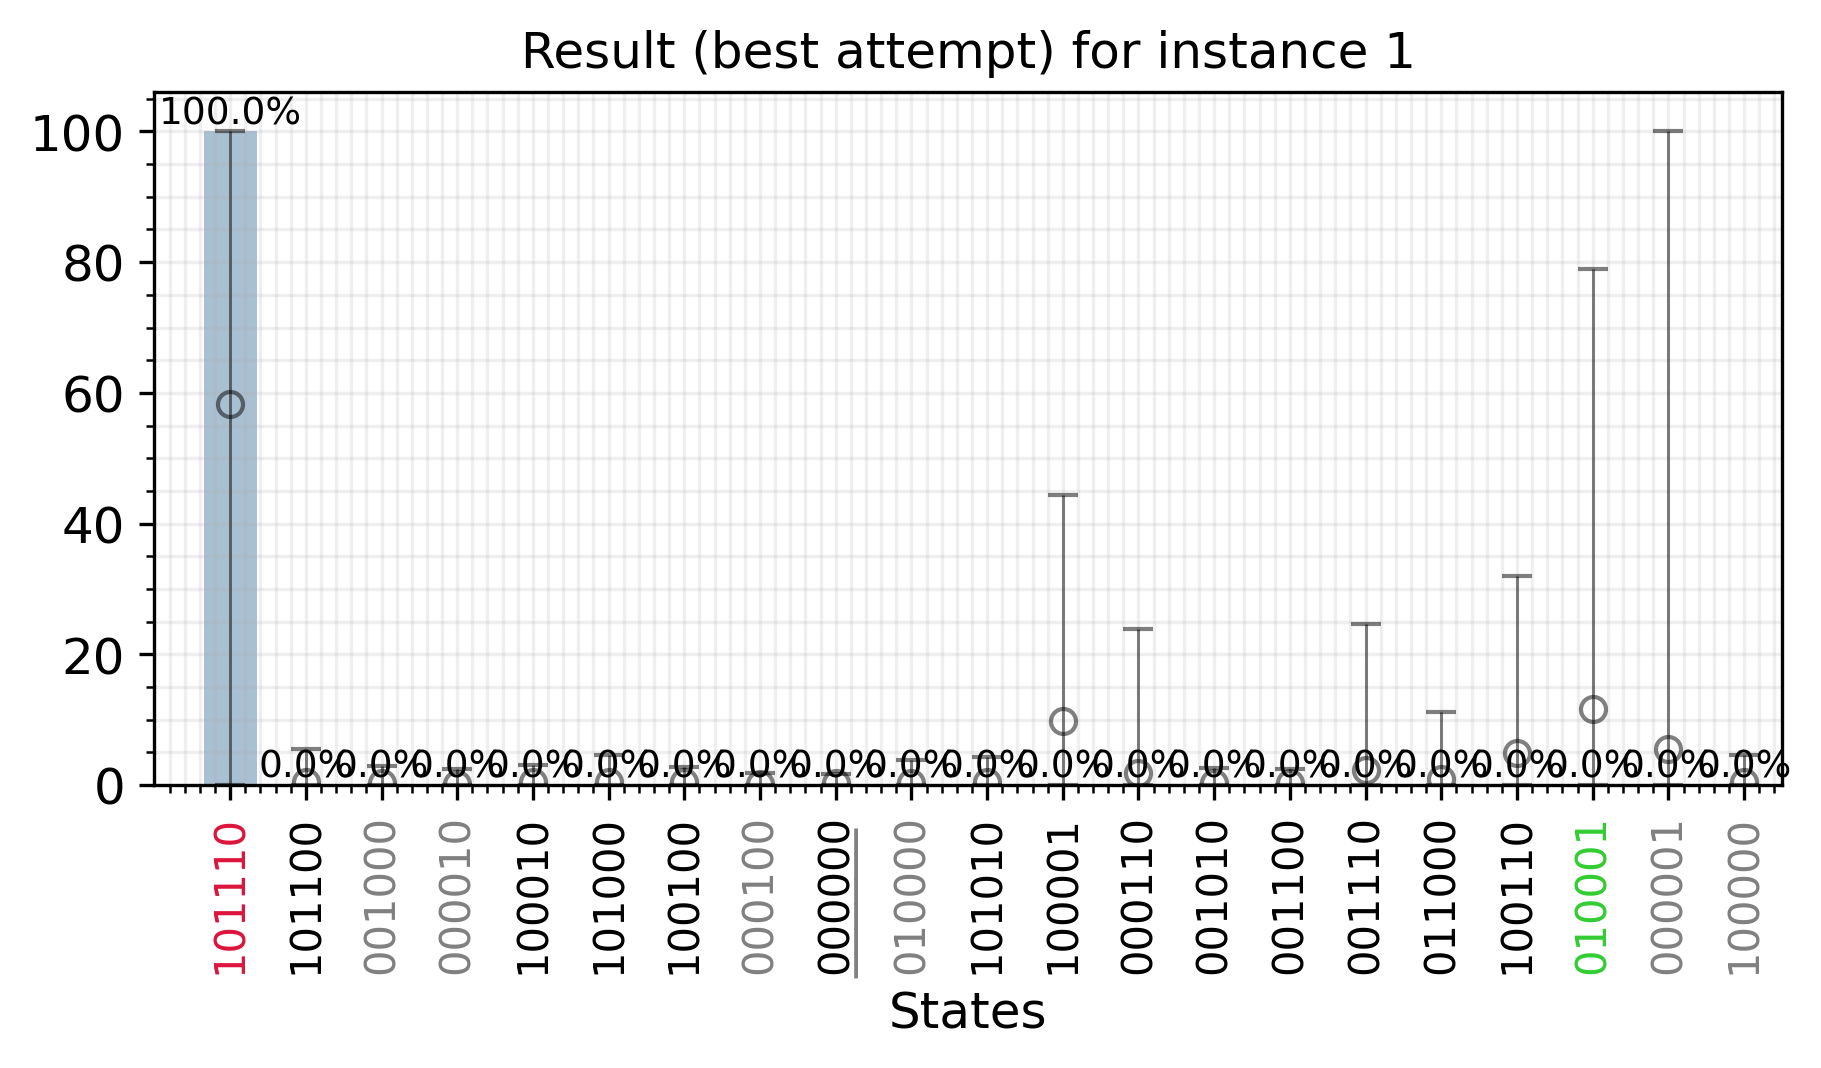

Result saved in:
random_parameters_2025-07-23@10h37m20s/dim6_mail1_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432].csv
random_parameters_2025-07-23@10h37m20s/dim6_mail1_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432]_data.txt

TOTAL ELAPSED TIME: 33.4049561103185 minutes.
1.0 2
**************************************************
Instance 2 with h = 1.0

U, subsets, EXACT_COVERS, MEC {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} [{12, 5, 6, 7}, {1, 5, 7, 8, 9, 12}, {1, 2, 3, 5, 8, 9, 10, 11, 12}, {4, 6, 7}, {4, 6}, {10, 11, 2, 3}] ['001100', '010011'] ['001100']


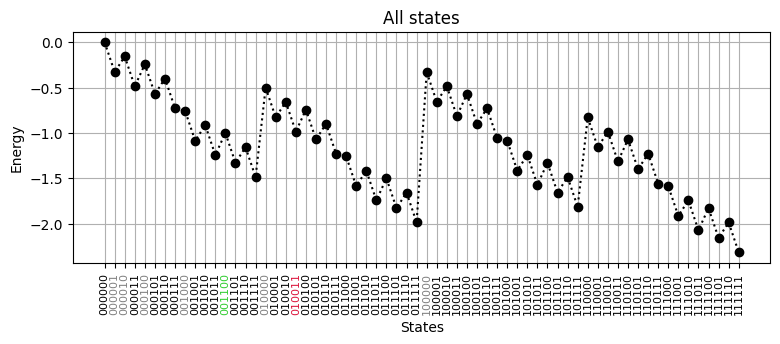

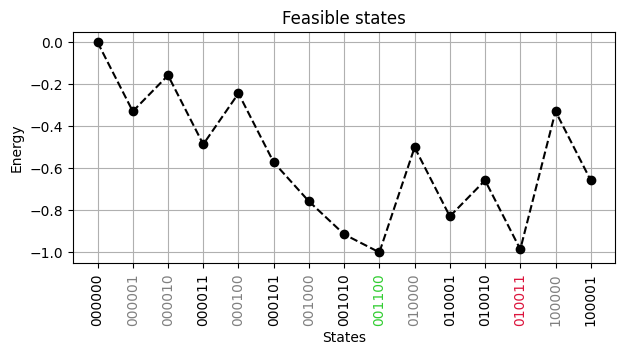

Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {12, 5, 6, 7}
  2: {1, 5, 7, 8, 9, 12}
  3: {1, 2, 3, 5, 8, 9, 10, 11, 12}
  4: {4, 6, 7}
  5: {4, 6}
  6: {10, 11, 2, 3}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
A = 1.2
B = 0.04285714285714286
constant = -A + B = -1.157142857142857

hamiltonian:
 SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII'],
              coeffs=[0.16428571+0.j, 0.25      +0.j, 0.37857143+0.j, 0.12142857+0.j,
 0.07857143+0.j, 0.16428571+0.j])
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {12, 5, 6, 7}
  2: {1, 5, 7, 8, 9, 12}
  3: {1, 2, 3, 5, 8, 9, 10, 11, 12}
  4: {4, 6, 7}
  5: {4, 6}
  6: {10, 11, 2, 3}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
Mixing circuit created for instance 2 with 6 qubits.
Circuit dimension (QC_DIM): 9
Number of ancillas: 3
Number of control gates: 4
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {12, 5, 6, 7}
  2: {1, 5, 7, 8, 9, 12}
  3: {1, 2, 3, 5, 8

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8219354288322731
E_min = result.fun = 0.33520742831058387

Optimal parameters: betas, gammas = [1.6888189909250262, 6.283185307174737, 3.48922276085359, 5.1644590366224], [2.506346163598844, -3.8964514768881315, -7.7968324831990925, 9.995976625050162]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_2of50
11  010011              409
9   010001              159
10  010010              104
7   001100               77
5   001000               69
4   000101               61
6   001010               44
1   000010               43
0   000000               18
13  100001               17
2   000011                9
12  100000                7
8   010000                6
3   000100                1

---------- 3/50 random_attempts -----------

pars_0 = [0.2729820469217236, 5.960084281003054, 5.104897136820128, 1.1637207045999722, -2.1619343072226487, 9.98181661174408, -2.5219362546572786, 4.658373641157988]
bnds = [(0, 6.283185307179586), (0, 6.2

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.751465276807554
E_min = result.fun = 0.40567758033530305

Optimal parameters: betas, gammas = [0.4975444491500677, 6.28318530717902, 4.64298924689461, 2.8860916901139806], [0.007631363162688716, 9.99597662212409, 0.7287784035917291, 9.995976625026609]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_3of50
12  010011              414
11  010010              158
1   000001               62
14  100001               60
13  100000               59
6   001000               51
8   001100               35
5   000101               34
9   010000               33
7   001010               31
0   000000               23
3   000011               23
4   000100               16
10  010001               16
2   000010                9

---------- 4/50 random_attempts -----------

pars_0 = [4.230482841930791, 6.049925419675825, 4.550892749592825, 5.826478553887474, 4.810742607760881, -3.93494113599938, -9.755449175589067, 6.215943651576364]
bnds = [(0, 6.2

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8612157002713066
E_min = result.fun = 0.29592715687155047

Optimal parameters: betas, gammas = [2.4334114422046307, 4.149015325836023, 3.535215017975468, 5.724668393485578], [7.236521157264564, 1.9809151760599837, -9.9959757501219, 5.205328165751734]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_4of50
8   001100              362
12  010011              178
7   001010              129
6   001000              128
14  100001               51
3   000011               48
10  010001               41
11  010010               26
9   010000               20
1   000001               18
13  100000                9
0   000000                8
2   000010                3
5   000101                2
4   000100                1

---------- 5/50 random_attempts -----------

pars_0 = [2.621717522943572, 5.6453425475804675, 3.143430878613241, 2.233012988810202, 4.230697310069276, -1.3273349989011827, -9.145308634035965, 2.4082795424728562]
bnds = [(0, 6.28

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9358520368386938
E_min = result.fun = 0.22129082030416325

Optimal parameters: betas, gammas = [2.7156705955053644, 5.189424715022993, 1.429320489046542, 3.450221784340754], [9.995976625058432, 0.17894525953212526, -8.997840321607196, -3.219312501035551]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_5of50
12  010011              674
7   001010              156
8   001100               75
6   001000               36
10  010001               24
11  010010               16
2   000010                8
3   000011                8
4   000100                8
9   010000                8
13  100001                8
0   000000                1
1   000001                1
5   000101                1

---------- 6/50 random_attempts -----------

pars_0 = [5.024803103899436, 6.103446991599518, 0.8614160426106229, 1.46102825658021, -9.433104956045167, 9.114781875105326, -4.46496013293882, -7.2585710840040765]
bnds = [(0, 6.283185307179586), (0, 6.2831

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9524418146385027
E_min = result.fun = 0.20470104250435422

Optimal parameters: betas, gammas = [6.283185307179586, 5.183052345004007, 1.3607841414525668, 1.156413937697796], [5.729219025394167, 9.99404540626516, -4.514068884894326e-07, -1.2811481977502075e-06]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_7of50
4   001100              890
5   010000               30
7   010010               30
8   010011               22
3   001010               12
0   000100               11
1   000101                9
6   010001                9
9   100000                9
2   001000                1
10  100001                1

---------- 8/50 random_attempts -----------

pars_0 = [6.053380428181787, 3.19648005485062, 5.788648657394675, 5.643394288600255, 1.8448911575754714, -8.21386732771222, -3.446168932835092, 0.3934680719127641]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.9959766250584

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8088643881692001
E_min = result.fun = 0.3482784689736569

Optimal parameters: betas, gammas = [5.023132572367459, 3.5818633113617007, 5.908357812659359, 5.554642204414201], [-1.3550740584471481, -9.995467951753673, -7.446218911419193, 2.5912513123077967]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_8of50
7   001100              291
9   010010              259
10  010011              242
5   001000               50
4   000101               48
6   001010               33
1   000001               32
12  100001               27
0   000000               13
2   000010               11
11  100000               10
8   010000                6
3   000011                2

---------- 9/50 random_attempts -----------

pars_0 = [2.8233060112138584, 2.7570314623241905, 5.236380150528184, 2.423118642080877, 8.057206815055522, -9.78298737660582, -7.473350693086798, 2.110710076466658]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.2831

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8337659533803565
E_min = result.fun = 0.32337690376250056

Optimal parameters: betas, gammas = [2.2468998497394352, 1.9920627991458209, 6.127199014561964, 3.871707510243762], [-2.292263514163941, -9.736325090096209, -7.697762413211578, -1.0081284435104787]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_9of50
7   001010              339
12  010011              289
6   001000              168
14  100001               43
11  010010               36
13  100000               29
1   000001               27
5   000101               23
9   010000               22
2   000010               16
10  010001               13
8   001100               12
3   000011                3
4   000100                3
0   000000                1

---------- 10/50 random_attempts -----------

pars_0 = [0.020841624919008303, 3.0118680895364864, 3.9210032853434873, 5.672298684277753, -3.2473854563024416, 9.021073555350952, 5.499467264012251, 4.644683737889844]
bnd

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7894782241998866
E_min = result.fun = 0.36766463294297047

Optimal parameters: betas, gammas = [2.146042042910062e-12, 1.6997413380934212, 4.013220754862848, 5.5538770928913745], [-6.236643371564902, 9.954330038925384, 6.242485600964816, 6.067875468614888]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_10of50
12  010011               522
14  100001               126
11  010010                91
7   001010                74
3   000011                38
4   000100                37
1   000001                32
0   000000                30
13  100000                23
8   001100                18
6   001000                17
2   000010                 9
10  010001                 4
9   010000                 2
5   000101                 1

---------- 11/50 random_attempts -----------

pars_0 = [6.139426766319708, 5.625927004806377, 4.3591852958593105, 4.99256497428531, -5.807137101402582, -1.3714910897022392, 8.877559857647988, -0.8112389

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8104612494178969
E_min = result.fun = 0.34668160772496015

Optimal parameters: betas, gammas = [6.017954451509926, 5.296256250777365, 3.843298050067946, 5.458773458287708], [-4.61593441171205, -2.238901300549282, 9.995976509606056, -0.6646200364232647]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_11of50
12  010011               269
8   001100               228
10  010001               147
6   001000                63
5   000101                62
11  010010                60
2   000010                49
7   001010                43
14  100001                30
1   000001                22
9   010000                21
0   000000                14
3   000011                12
13  100000                 3
4   000100                 1

---------- 12/50 random_attempts -----------

pars_0 = [4.88383697172495, 0.15123751793504206, 4.952824725603147, 2.798302257617409, -1.5687165466183313, 6.9829150682551955, -1.6779325396233045, 9.452477640

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8694688837743609
E_min = result.fun = 0.28767397336849615

Optimal parameters: betas, gammas = [1.420022848106631, 1.2793483075202765, 1.930860256456553, 3.593399715545223], [-8.799634501274415, 3.7470480473885273, 6.56512283390555, 5.107656470385383]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_14of50
9   010011               468
4   001000               221
8   010010                73
5   001010                66
6   001100                61
7   010001                55
11  100001                49
0   000000                10
1   000010                 7
2   000011                 7
10  100000                 4
3   000101                 3

---------- 15/50 random_attempts -----------

pars_0 = [4.3100348431163065, 1.8749159369268749, 0.9772012293948751, 1.3327124108005441, 5.138598497822693, -4.420503397615392, -0.4141420208119495, 6.164155370861003]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586),

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9278130595145282
E_min = result.fun = 0.22932979762832886

Optimal parameters: betas, gammas = [2.6613142416162905, 5.352204390213576, 1.4447202342149001, 3.3287461352294034], [4.524792148138879, -0.832918139331563, 9.540385194694139, 0.5442040799089449]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_16of50
9   010011               662
6   001100               125
5   001010                76
4   001000                54
7   010001                28
8   010010                25
10  100001                21
2   000011                20
0   000001                 7
1   000010                 5
3   000101                 1

---------- 17/50 random_attempts -----------

pars_0 = [0.11231979579903867, 1.5038099942115748, 3.461247136370717, 2.8404467577773103, 8.5784195080453, -6.831433386043077, -6.299739652627508, 3.612981064486446]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.885294240919277
E_min = result.fun = 0.2718486162235801

Optimal parameters: betas, gammas = [0.22200466493735732, 2.0408048871305473, 5.140135934117411, 2.2807226671761773], [-4.151839127278705, 0.15761472643944438, 0.27280615507347483, -0.31268107382463983]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_17of50
11  010011               706
9   010001               110
10  010010                47
12  100000                43
13  100001                41
2   000011                36
6   001010                11
7   001100                11
1   000001                 6
8   010000                 5
4   000101                 3
5   001000                 3
0   000000                 1
3   000100                 1

---------- 18/50 random_attempts -----------

pars_0 = [2.239327739040807, 3.7382126076404507, 4.123519021564772, 5.693973677240239, 6.938476733998495, -6.773491576937632, 4.47097277131563, 7.513840119171395]
bnds = [(0, 6.28318

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8337658347999636
E_min = result.fun = 0.32337702234289345

Optimal parameters: betas, gammas = [2.247197003006012, 1.9920766582051408, 6.127069594493145, 3.8709793667504684], [5.498024273806466, -9.73484719601305, -7.695631205973466, -1.0087571573644816]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_21of50
6   001010               381
11  010011               283
5   001000               172
13  100001                45
10  010010                23
0   000001                22
8   010000                22
12  100000                18
4   000101                16
9   010001                14
7   001100                10
1   000010                 9
2   000011                 6
3   000100                 3

---------- 22/50 random_attempts -----------

pars_0 = [1.3923410018417635, 1.9559310600881568, 3.5593646161453427, 0.13534218777341214, 4.13382167697546, -5.761500561869104, 9.905335563820643, -2.6288225670263268]
bnds = [(0, 6.2831

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8673716438311536
E_min = result.fun = 0.28977121331170336

Optimal parameters: betas, gammas = [1.171855559110468, 0.9515871863320212, 3.605276242024991, 0.8921638093384929], [4.1884527369294595, -4.130460710203348, 9.863983761380185, -1.2065699455408376]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_22of50
12  010011               611
7   001010               124
14  100001                88
11  010010                64
6   001000                36
1   000001                22
3   000011                21
10  010001                21
9   010000                12
5   000101                 9
13  100000                 6
2   000010                 4
0   000000                 2
4   000100                 2
8   001100                 2

---------- 23/50 random_attempts -----------

pars_0 = [4.391793415472108, 3.270356239274731, 5.6408859519125425, 3.2674769007625954, 5.33596854380394, 7.5318049958521875, -5.878536938734651, -6.92883436

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8033487592158509
E_min = result.fun = 0.3537940979270061

Optimal parameters: betas, gammas = [3.739629816846808, 3.970416040133739, 6.283185307179281, 3.324883552397999], [3.0645469150360167, 9.567729574552803, -5.48117304731033, -7.346894602388488]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_23of50
6   001000               446
8   001100               163
11  010011               147
7   001010               125
13  100001                49
2   000010                47
12  100000                12
10  010001                11
1   000001                 7
0   000000                 5
3   000011                 3
4   000100                 3
5   000101                 3
9   010000                 3

---------- 24/50 random_attempts -----------

pars_0 = [2.816564694084872, 4.435896161406127, 5.609661599082943, 0.8683841371265857, 3.8820929649180513, -1.5379480836461727, -3.7692888152966306, -9.197891437571386]
bnds = [(0, 6.28318530

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8739926858905318
E_min = result.fun = 0.28315017125232517

Optimal parameters: betas, gammas = [3.8300212296124645, 2.7929681051715596, 4.873926682954238, 1.2442505090552323], [5.681487525364705, 1.7619575596443924, -4.425752347793265, -7.830517538805774]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_24of50
11  010011               445
6   001010               177
9   010001                98
7   001100                89
10  010010                75
5   001000                54
2   000011                38
8   010000                16
3   000100                13
4   000101                 6
13  100001                 5
12  100000                 4
1   000001                 3
0   000000                 1

---------- 25/50 random_attempts -----------

pars_0 = [2.6386117309264576, 2.308542419425985, 4.221893988639924, 0.5635668148912473, -8.318835483545445, -1.551932390488247, 4.933321469877024, 8.377492032750187]
bnds = [(0, 6.283185

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9075215661666892
E_min = result.fun = 0.24962129097616778

Optimal parameters: betas, gammas = [3.4976946823609127, 2.415706086354493, 4.200924455689375, 1.1840898249219685], [7.292330678117107, -9.991907915457885, -0.7612854248299425, 8.140345454573447]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_25of50
5   001100               496
4   001010               265
9   010011                74
7   010001                61
3   001000                40
11  100001                34
10  100000                16
1   000001                14
0   000000                11
8   010010                 7
2   000010                 4
6   010000                 2

---------- 26/50 random_attempts -----------

pars_0 = [2.7560700523301915, 3.8840714906478495, 1.7135126125288511, 4.694529395480105, -2.596983791299178, 6.659796186923117, -8.831841607916434, 2.2131057422878904]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9351864165042572
E_min = result.fun = 0.22195644063859993

Optimal parameters: betas, gammas = [3.529756869591738, 5.204328044418636, 1.5064772928912924, 3.478554015861688], [-4.483901566257021, 9.098063549912055, -8.87192236306699, -3.252784632167436]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_26of50
10  010011               668
5   001010               160
6   001100                93
4   001000                28
8   010001                22
2   000011                15
1   000010                14
9   010010                14
3   000100                 3
7   010000                 3
11  100000                 2
0   000000                 1
12  100001                 1

---------- 27/50 random_attempts -----------

pars_0 = [2.604512100804746, 2.462237924286581, 2.4537051081361057, 4.619355310601147, -1.6952154194269564, 4.9333656137816355, 7.087687767588857, 4.271143591722279]
bnds = [(0, 6.283185307179586), (0, 6.28318530717958

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8761708187671968
E_min = result.fun = 0.2809720383756602

Optimal parameters: betas, gammas = [1.7084256163149871, 3.386420382112134, 5.349617391247566, 1.6599142212885196], [-6.318795623365642, -8.369626254743089, -1.4233859219607905, -1.4322770354828762]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_28of50
11  010011               386
6   001010               232
7   001100               184
13  100001                48
10  010010                43
9   010001                30
8   010000                27
12  100000                26
3   000100                22
1   000010                 8
5   001000                 6
0   000000                 5
4   000101                 4
2   000011                 3

---------- 29/50 random_attempts -----------

pars_0 = [5.138323744285266, 3.80628783266352, 1.113549006529045, 3.2919550102040036, 8.520969015862164, 3.7411507984984045, -1.7478978887605177, -7.6515758922876405]
bnds = [(0, 6.2831

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9002055593759825
E_min = result.fun = 0.2569372977668746

Optimal parameters: betas, gammas = [5.2170143193146075, 5.032891771652903, 1.7019265826797911, 3.537333787220268], [8.654409614643104, -0.00035628809828505193, 0.00033425899774063505, -0.0002382599700049816]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_29of50
5   001100               642
7   010001               157
8   010010               106
3   001000                57
4   001010                25
1   000011                16
6   010000                 6
0   000000                 5
9   100000                 4
2   000101                 3
10  100001                 3

---------- 30/50 random_attempts -----------

pars_0 = [1.7779798611315587, 2.0865493755462143, 0.8832980286072533, 5.459012644689556, 1.4849502595702138, 9.882127727263374, -3.432440910195541, 0.223012531075387]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8151246342590763
E_min = result.fun = 0.3420182228837807

Optimal parameters: betas, gammas = [0.849085136056434, 1.304323384578769, 0.8954857355495203, 6.283182515102028], [2.0330629817643717, 8.23111410385617, -0.1458150651466374, -8.641437933529012]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_30of50
8   001100               293
7   001010               201
6   001000               158
11  010010               134
12  010011                68
9   010000                39
13  100000                35
10  010001                28
14  100001                27
3   000011                23
2   000010                 7
5   000101                 7
0   000000                 2
1   000001                 1
4   000100                 1

---------- 31/50 random_attempts -----------

pars_0 = [0.22958542131453358, 5.246280284827674, 4.273144640132298, 2.170333640298827, 4.5852634732334145, 1.5919878755033796, 0.8228912611848767, 8.3480664715

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8878868505436036
E_min = result.fun = 0.2692560065992534

Optimal parameters: betas, gammas = [0.7929328953927293, 6.243576045449083, 4.416905758246477, 0.1789188415693861], [-7.704251540886148, 3.392264793110658, -3.1812622611057497, 7.306007347685503]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_31of50
7   001100               541
10  010011               195
12  100001               153
5   001000                55
2   000011                19
1   000010                14
4   000101                12
9   010010                12
11  100000                12
6   001010                 5
3   000100                 3
8   010000                 2
0   000001                 1

---------- 32/50 random_attempts -----------

pars_0 = [0.40780752799988484, 3.540099332600543, 3.6050435902740223, 3.883780177327215, -4.67838125768806, -6.778372316955549, 5.445626026110709, -6.365106278632151]
bnds = [(0, 6.283185307179586), (0, 6.283185307179

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8459207308125327
E_min = result.fun = 0.31122212633032437

Optimal parameters: betas, gammas = [1.8152349304918464e-05, 2.244717958384241, 4.500793018077175, 3.697682024874947], [-9.995976625058432, -6.150119180598544, 0.6127188375846968, -9.539503011094013]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_32of50
12  010011               394
8   001100               255
6   001000               126
13  100000                68
7   001010                56
0   000000                23
4   000100                23
3   000011                18
1   000001                14
2   000010                13
14  100001                12
9   010000                 7
10  010001                 7
5   000101                 4
11  010010                 4

---------- 33/50 random_attempts -----------

pars_0 = [3.3584287165297293, 1.7027764953335187, 0.2723108652410732, 1.2025875979668226, 8.015113781130715, 1.5598363160671003, -0.3129923258110452, -3.9

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8612537940591936
E_min = result.fun = 0.2958890630836635

Optimal parameters: betas, gammas = [0.7009475282606328, 1.367632787026718, 2.022331991010269, 1.126567287704367], [9.834595608018546, 4.012758537023544, 0.7922803916935308, -3.2447360364749986]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_33of50
10  010011               415
5   001010               149
8   010001               126
6   001100                97
9   010010                75
12  100001                38
4   001000                37
11  100000                24
1   000011                21
7   010000                21
3   000101                15
0   000001                 5
2   000100                 1

---------- 34/50 random_attempts -----------

pars_0 = [0.5108218514686775, 0.17547315319865087, 1.2654922478105146, 1.6987640455988195, 8.82644710837954, 3.5793397404956657, -4.30101755389115, -3.8597851391294737]
bnds = [(0, 6.283185307179586), (0, 6.28318530717

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8429843019213243
E_min = result.fun = 0.3141585552215327

Optimal parameters: betas, gammas = [0.777791195102645, 1.3517811933659565, 0.8995240550989887, 0.5609196717792018], [-8.095271835232424, 7.4466101929855775, 0.8959320194448703, -2.709273054778503]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_34of50
8   001100               291
7   001010               198
6   001000               164
12  010011               127
11  010010                84
14  100001                59
10  010001                32
13  100000                21
9   010000                20
3   000011                12
1   000001                 6
5   000101                 5
2   000010                 2
4   000100                 2
0   000000                 1

---------- 35/50 random_attempts -----------

pars_0 = [0.2027323226076406, 5.226591733133924, 2.665197490011511, 5.9214280563760875, 8.823125540380413, 9.973716475556369, 5.538873833334472, 1.3692946719

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8250550145877401
E_min = result.fun = 0.3320878425551169

Optimal parameters: betas, gammas = [0.6001580798177728, 5.897093292372759, 2.207411687000663, 6.283185305353871], [9.685409847427621, 9.99597656694531, 1.4380770610524216, -0.06677047412597786]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_35of50
5   001100               393
11  100001               193
9   010011               132
7   010001                85
8   010010                62
2   000100                42
10  100000                36
1   000010                26
4   001010                21
0   000001                18
6   010000                11
3   001000                 5

---------- 36/50 random_attempts -----------

pars_0 = [5.996093248931185, 4.294026654886707, 0.054822746284614525, 0.5248888418285318, -1.7948390200341695, 9.409332228835787, 0.6389234678239575, -1.1895571887466936]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.28318530717958

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7349051505773918
E_min = result.fun = 0.42223770656546517

Optimal parameters: betas, gammas = [5.3237002396666995, 3.6750956329997475, 6.430058461759668e-13, 0.2698295263373688], [-0.1150265241303933, 9.995976625058432, 1.5067082901574302, -5.796952521060907]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_36of50
8   001100               244
11  010010               133
12  010011               127
14  100001                89
5   000101                73
10  010001                72
13  100000                71
9   010000                56
7   001010                47
6   001000                43
3   000011                31
1   000001                19
4   000100                12
0   000000                 6
2   000010                 1

---------- 37/50 random_attempts -----------

pars_0 = [3.191353133348899, 2.6093461829898907, 2.2589497657479103, 3.2012762929241467, 5.901145412239009, 6.197614368075573, 4.7341740802786045, 0.164

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7896605795660561
E_min = result.fun = 0.36748227757680096

Optimal parameters: betas, gammas = [0.42862706524239047, 3.156987730474185, 2.228559528370174, 2.736909194318164], [9.995976625058432, 4.334360248453859, 4.040527997960943, 0.09470415445400038]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_37of50
6   001000               272
12  010011               235
10  010001               162
7   001010               120
8   001100                55
9   010000                55
11  010010                31
13  100000                31
2   000010                22
0   000000                18
1   000001                12
4   000100                 4
14  100001                 4
3   000011                 2
5   000101                 1

---------- 38/50 random_attempts -----------

pars_0 = [5.270285933411314, 5.878935687707725, 4.517236723041722, 1.4016793216653347, -9.209470623387965, 5.964258778715715, -2.918185930385353, 4.18796677981

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8038476631676736
E_min = result.fun = 0.35329519397518344

Optimal parameters: betas, gammas = [3.9064900137038467, 2.26606914229934, 5.979588102627201, 2.91408673293064], [-9.995976625058432, -0.3057442440021576, -0.797017157729635, -1.9378525518735543]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_39of50
6   001000               354
7   001010               223
12  010011               164
8   001100                88
14  100001                88
3   000011                25
0   000000                23
4   000100                16
9   010000                12
5   000101                 9
11  010010                 9
2   000010                 6
13  100000                 4
10  010001                 2
1   000001                 1

---------- 40/50 random_attempts -----------

pars_0 = [0.7702968006243444, 3.371438187666963, 1.497205981335222, 5.273493745181574, 4.288962353038814, 3.212269308865965, 0.3421902895221738, 3.39233948746

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9015819335487633
E_min = result.fun = 0.25556092359409377

Optimal parameters: betas, gammas = [1.1280070690824942, 3.7855544663529486, 0.0357106961072175, 5.2252275575027], [-5.820854552929077, 0.04284344963990443, -1.90534573676947, 1.9195116599189435]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_40of50
11  010011               517
7   001100               218
9   010001                87
10  010010                45
13  100001                39
3   000011                35
6   001010                29
0   000000                23
2   000010                15
5   001000                 8
1   000001                 3
8   010000                 3
4   000100                 1
12  100000                 1

---------- 41/50 random_attempts -----------

pars_0 = [5.83071816351622, 2.4959144914418365, 3.892405719049926, 3.900471520940406, -9.425715910952434, 2.7357947415556882, 5.01355524938562, 3.622520080092997]
bnds = [(0, 6.2831853071

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8465906010845992
E_min = result.fun = 0.3105522560582578

Optimal parameters: betas, gammas = [6.242141890267087, 2.2157270900431953, 4.51078196892947, 3.667841774228057], [-9.99259859522493, 6.071916310195013, -0.4931483607197344, 9.653686971976589]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_41of50
12  010011               397
8   001100               270
6   001000               121
7   001010                70
13  100000                68
1   000001                17
0   000000                14
3   000011                13
2   000010                11
14  100001                11
4   000100                 9
9   010000                 7
10  010001                 7
11  010010                 5
5   000101                 4

---------- 42/50 random_attempts -----------

pars_0 = [5.854939388253206, 2.215609539075677, 0.043237428195560305, 2.4609553351442672, 7.103485191719557, -4.224281566102993, -2.3232548287165056, 0.8188277172

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9463206545357571
E_min = result.fun = 0.21082220260709997

Optimal parameters: betas, gammas = [5.239223894061357, 1.3615156075598853, 0.010446885875682304, 5.254477822249138], [-5.572016330839464, 0.17740380614276574, -9.54551237572548, -2.9437386259277734]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_42of50
5   001100               889
6   010000                39
2   000101                23
10  100000                16
8   010010                15
7   010001                12
3   001000                10
11  100001                10
9   010011                 5
1   000011                 3
0   000000                 1
4   001010                 1

---------- 43/50 random_attempts -----------

pars_0 = [4.325636671925123, 1.840456135792953, 0.6285775115904195, 3.999339696573281, -9.659746715205566, -5.478101980892095, 5.730530482116519, -5.379768611887293]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.2831853071795

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8449616565105726
E_min = result.fun = 0.31218120063228444

Optimal parameters: betas, gammas = [5.229113926761073, 0.7354889533497729, 6.283185307179586, 4.562755582032695], [-9.54535965422351, -0.12613022228636606, -1.92527412520365, -6.27532261302448]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_44of50
6   001010               270
7   001100               232
5   001000               199
11  010011                99
13  100001                77
9   010001                52
10  010010                45
8   010000                13
0   000001                10
3   000100                 9
2   000011                 8
12  100000                 7
4   000101                 2
1   000010                 1

---------- 45/50 random_attempts -----------

pars_0 = [2.935380293857068, 5.722555868237143, 5.652936983286833, 5.293472341455628, 4.791529924555313, -4.8861325248658805, -9.079497313215676, -6.57354927718173]
bnds = [(0, 6.283185307

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7801070264588632
E_min = result.fun = 0.37703583068399377

Optimal parameters: betas, gammas = [2.1180770563459896, 0.9097841882736191, 6.121463129111202, 2.4421283524656126], [-9.995976625058432, -9.99577400937342, -0.9171451401360395, 9.995976625058432]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_47of50
12  010011               466
14  100001               172
11  010010               139
6   001000                86
0   000000                37
8   001100                26
3   000011                23
13  100000                20
10  010001                13
4   000100                12
7   001010                11
2   000010                 8
1   000001                 5
5   000101                 4
9   010000                 2

---------- 48/50 random_attempts -----------

pars_0 = [4.362700757597186, 0.8887387694609763, 3.9290106835870264, 3.0008497750721856, 9.044646785442911, 4.524267092930032, -9.976121618938215, 9.84613637

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8061613749283736
E_min = result.fun = 0.35098148221448344

Optimal parameters: betas, gammas = [3.556236563037667, 1.0972970134873647, 4.080753811705518, 2.89092234707418], [9.66989755918091, 6.372203255254311, -9.995973338443253, 5.929241433640499]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_48of50
5   001000               488
7   001100               320
6   001010                78
2   000010                31
8   010000                21
9   010001                20
12  100000                17
3   000011                14
13  100001                13
11  010011                12
1   000001                 4
4   000100                 4
0   000000                 1
10  010010                 1

---------- 49/50 random_attempts -----------

pars_0 = [0.9229426005350421, 5.210506973555566, 5.4662664294371055, 2.4494743161317287, 3.6840400682023287, 8.19446703489136, 3.4861256817260227, -3.684715117531458]
bnds = [(0, 6.28318530717

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.778212249769098
E_min = result.fun = 0.3789306073737591

Optimal parameters: betas, gammas = [0.48889292302137477, 5.717784545674183, 6.283185307078757, 2.7639281952248735], [3.731680575753094, 9.995976621385648, 2.923561107045761, -3.8272396363329637]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_49of50
13  100001               319
11  010011               206
6   001010               116
10  010010               105
7   001100                98
9   010001                75
2   000011                25
3   000100                17
1   000001                14
5   001000                13
4   000101                12
8   010000                12
12  100000                10
0   000000                 2

---------- 50/50 random_attempts -----------

pars_0 = [4.044805977479966, 1.5560615246470095, 0.6619127946639539, 4.740327753426703, -1.1298027071739227, 8.883726781573547, 3.0911701437680588, -2.794910287023092]
bnds = [(0, 6.2831853

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7598892812625488
E_min = result.fun = 0.39725357588030813

Optimal parameters: betas, gammas = [4.717296236916455, 1.3824816728257971, 1.2331459572174526, 6.283185307175389], [-3.4488341116274785, 7.257379881938549, 4.005396292181734, -0.21002955132687975]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_50of50
10  010001               260
12  010011               194
14  100001               166
5   000101               138
7   001010               101
1   000001                50
11  010010                33
8   001100                31
3   000011                18
9   010000                13
6   001000                10
4   000100                 7
0   000000                 1
2   000010                 1
13  100000                 1


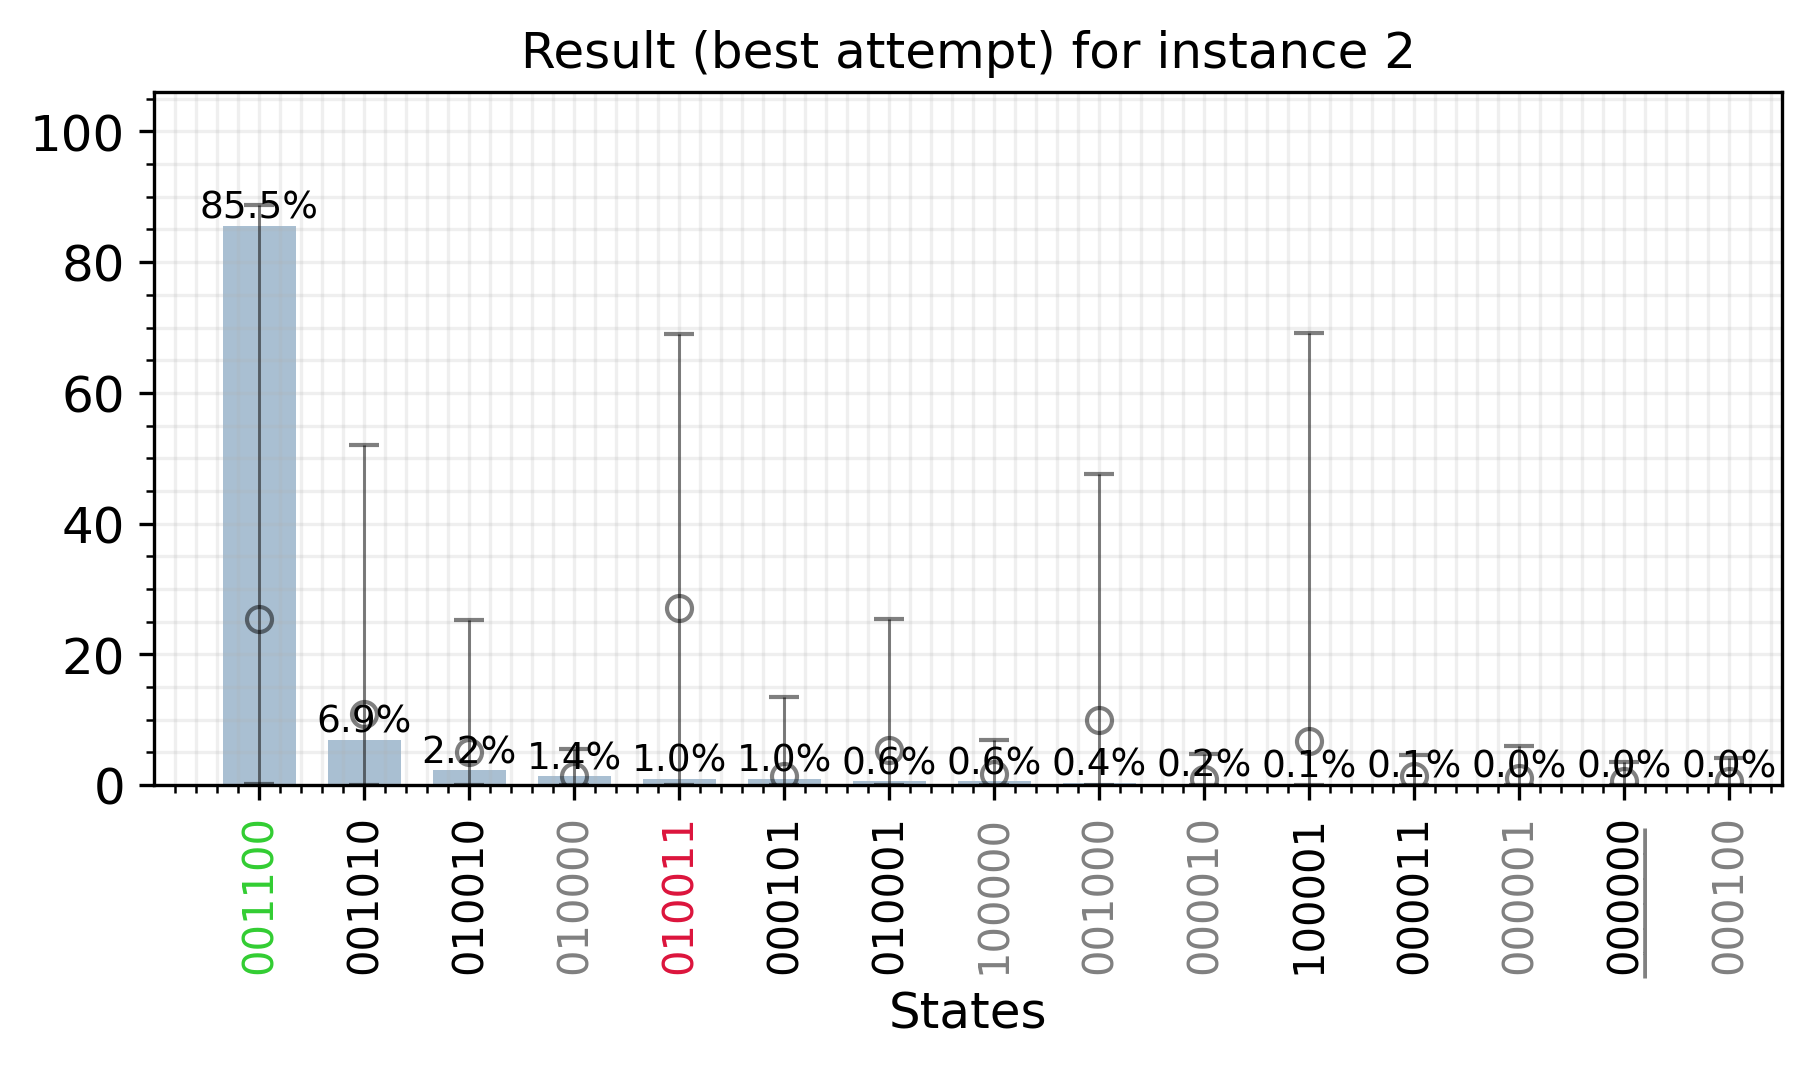

Result saved in:
random_parameters_2025-07-23@10h37m20s/dim6_mail2_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432].csv
random_parameters_2025-07-23@10h37m20s/dim6_mail2_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432]_data.txt

TOTAL ELAPSED TIME: 60.094046199321745 minutes.
1.0 3
**************************************************
Instance 3 with h = 1.0

U, subsets, EXACT_COVERS, MEC {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} [{8, 3, 6}, {1, 12, 4, 5}, {1, 11}, {2, 3, 4, 5, 6, 7, 8, 9, 10, 12}, {10, 11, 7}, {9, 2}] ['001100', '110011'] ['001100']


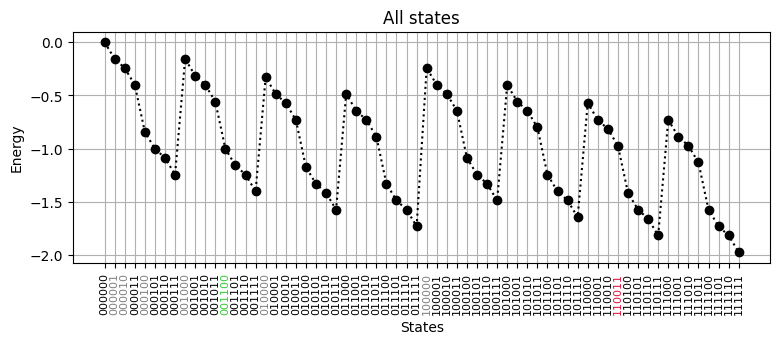

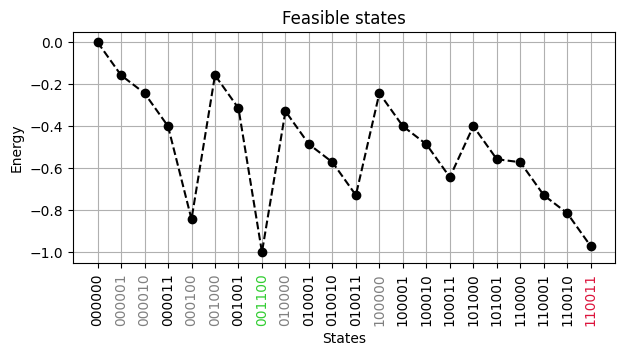

Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {8, 3, 6}
  2: {1, 12, 4, 5}
  3: {1, 11}
  4: {2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
  5: {10, 11, 7}
  6: {9, 2}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
A = 1.0285714285714285
B = 0.04285714285714286
constant = -A + B = -0.9857142857142857

hamiltonian:
 SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII'],
              coeffs=[0.12142857+0.j, 0.16428571+0.j, 0.07857143+0.j, 0.42142857+0.j,
 0.12142857+0.j, 0.07857143+0.j])
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {8, 3, 6}
  2: {1, 12, 4, 5}
  3: {1, 11}
  4: {2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
  5: {10, 11, 7}
  6: {9, 2}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
Mixing circuit created for instance 3 with 6 qubits.
Circuit dimension (QC_DIM): 9
Number of ancillas: 3
Number of control gates: 4
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {8, 3, 6}
  2: {1, 12, 4, 5}
  3: {1, 11}
  4: {2, 3, 4, 5, 6, 7, 8,

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7535178365471926
E_min = result.fun = 0.23219644916709298

Optimal parameters: betas, gammas = [0.6657499861154847, 1.7769554071298097e-12, 0.8025345904629877, 4.538885785459658], [5.582949664527359, 7.774480300433085, 7.8953372959570505, 3.733469089929167]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_22of50
7   001100               403
4   000100               216
17  101001                65
15  100011                61
8   010000                32
9   010001                32
2   000010                31
16  101000                31
14  100010                29
6   001001                24
0   000000                22
1   000001                16
13  100001                13
11  010011                10
18  110000                 9
19  110001                 9
10  010010                 6
3   000011                 6
12  100000                 4
21  110011                 3
5   001000                 1
20  110010                 1

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7822272947486681
E_min = result.fun = 0.20348699096561756

Optimal parameters: betas, gammas = [3.521741259445847, 1.7224976625412776, 1.6545131762103606, 1.5117078324304827], [-9.042336875558611, -0.23438672743881853, 1.11622721032849, -7.035855274899387]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_45of50
6   001100               501
3   000100               184
15  101000                59
16  101001                53
11  100000                34
7   010000                27
10  010011                21
8   010001                19
17  110000                17
5   001001                15
13  100010                14
18  110001                13
1   000001                13
12  100001                11
4   001000                 9
14  100011                 9
20  110011                 7
9   010010                 7
2   000011                 5
0   000000                 4
19  110010                 2

---------- 46/50 random_atte

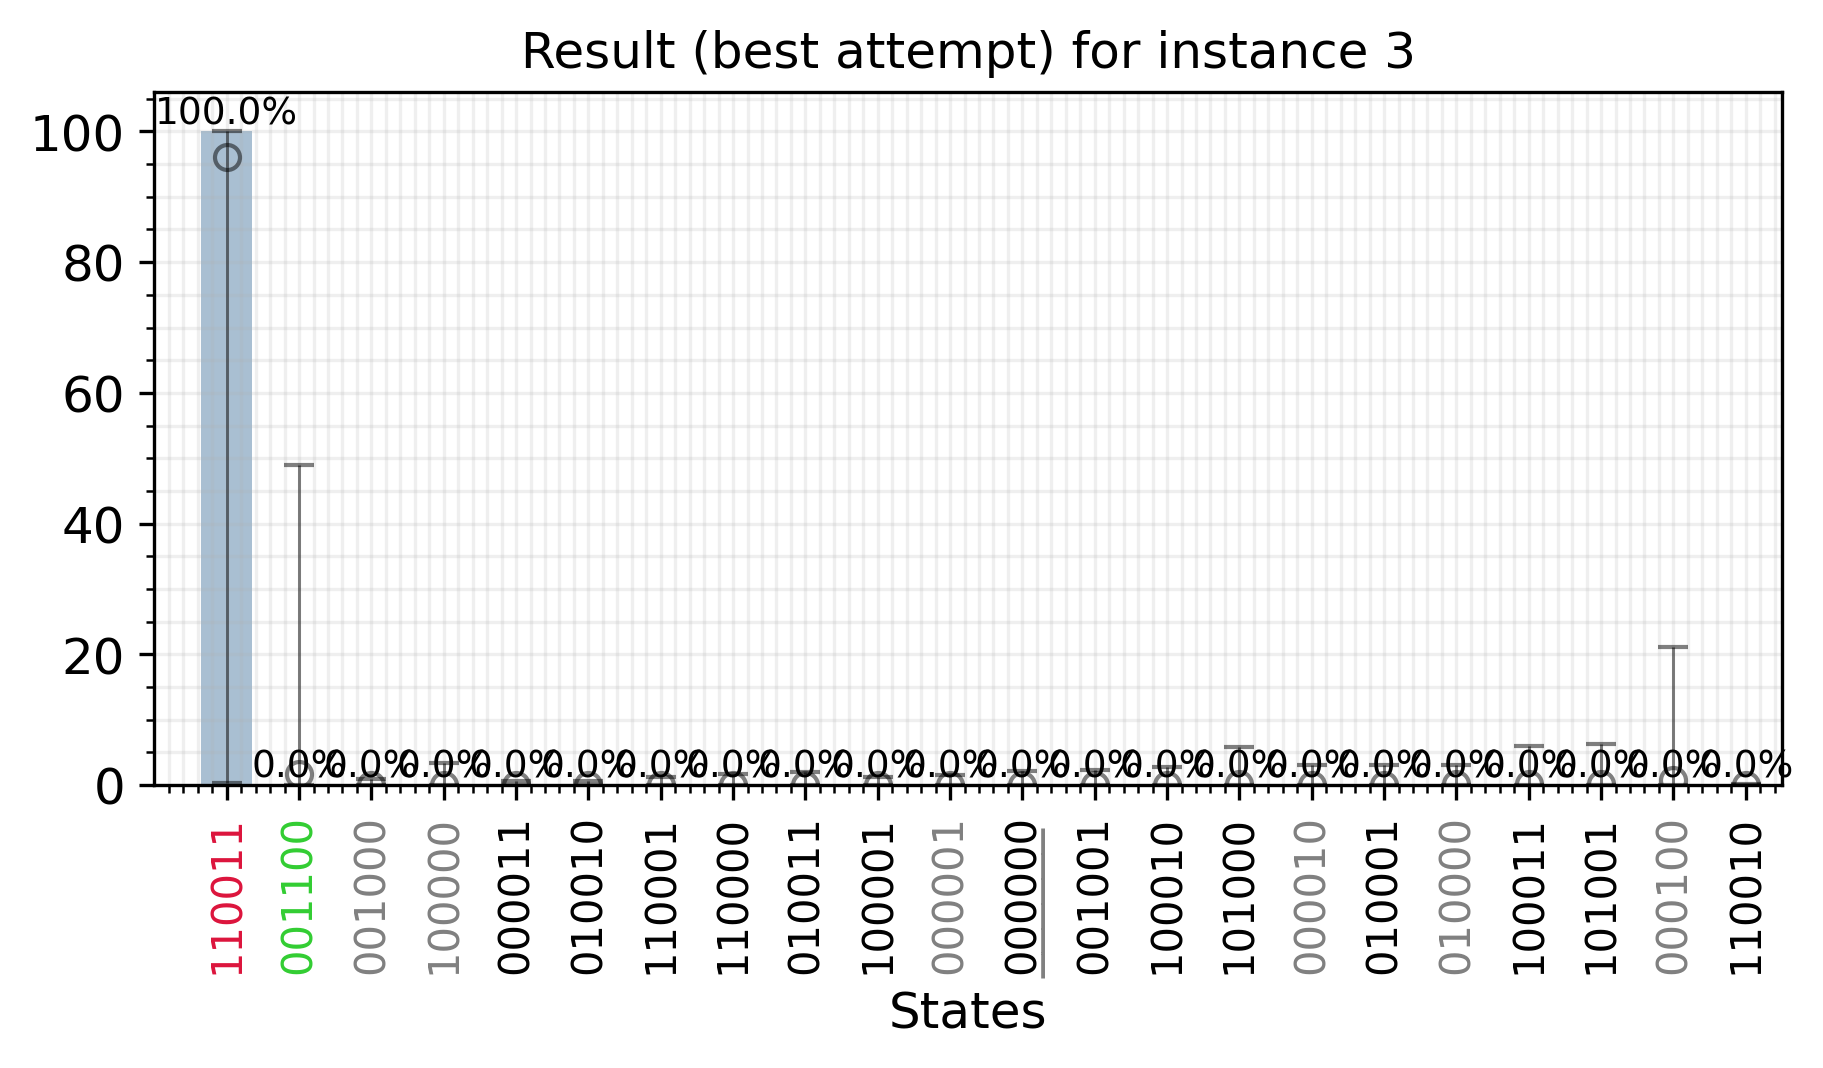

Result saved in:
random_parameters_2025-07-23@10h37m20s/dim6_mail3_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432].csv
random_parameters_2025-07-23@10h37m20s/dim6_mail3_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432]_data.txt

TOTAL ELAPSED TIME: 21.620018263657887 minutes.
1.0 4
**************************************************
Instance 4 with h = 1.0

U, subsets, EXACT_COVERS, MEC {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} [{2, 11, 4, 5}, {8, 10, 12}, {9, 4, 5, 6}, {1, 2, 3, 4, 5, 7, 8, 9, 10, 11}, {1, 2, 3, 7, 11}, {12, 6}] ['000101', '011010'] ['000101']


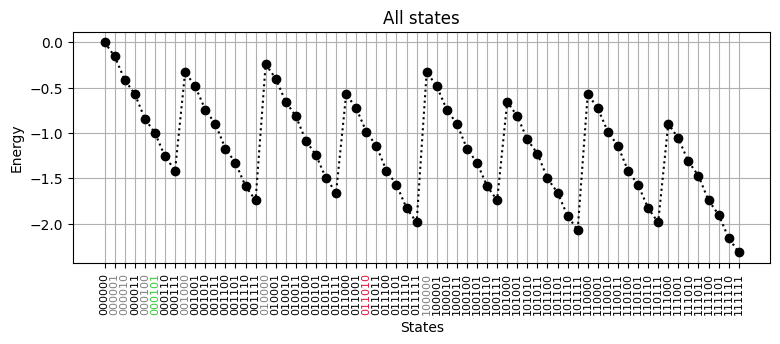

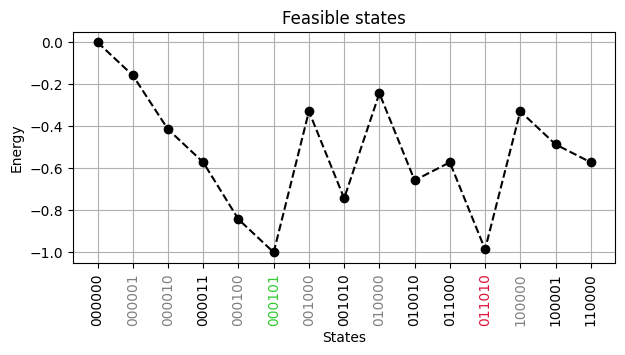

Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {2, 11, 4, 5}
  2: {8, 10, 12}
  3: {9, 4, 5, 6}
  4: {1, 2, 3, 4, 5, 7, 8, 9, 10, 11}
  5: {1, 2, 3, 7, 11}
  6: {12, 6}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
A = 1.2
B = 0.04285714285714286
constant = -A + B = -1.157142857142857

hamiltonian:
 SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII'],
              coeffs=[0.16428571+0.j, 0.12142857+0.j, 0.16428571+0.j, 0.42142857+0.j,
 0.20714286+0.j, 0.07857143+0.j])
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {2, 11, 4, 5}
  2: {8, 10, 12}
  3: {9, 4, 5, 6}
  4: {1, 2, 3, 4, 5, 7, 8, 9, 10, 11}
  5: {1, 2, 3, 7, 11}
  6: {12, 6}
num_max_ctrl: 4
NUM_ANC: 3
QC_DIM: 9
Mixing circuit created for instance 4 with 6 qubits.
Circuit dimension (QC_DIM): 9
Number of ancillas: 3
Number of control gates: 4
Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Subsets:
  1: {2, 11, 4, 5}
  2: {8, 10, 12}
  3: {9, 4, 5, 6}
  4: {1, 

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8226512129161703
E_min = result.fun = 0.3344916442266868

Optimal parameters: betas, gammas = [4.254112722585077, 4.396536929494623, 4.89117156525128, 4.092584550401796], [0.4333479111593723, 4.214235704204629, -8.531252814935293, 9.995976041883026]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_1of50
5   000101              469
11  011010              124
7   001010               93
4   000100               65
10  011000               62
13  100001               62
2   000010               35
14  110000               28
9   010010               27
6   001000               23
12  100000               13
3   000011                9
1   000001                7
8   010000                6
0   000000                1

---------- 2/50 random_attempts -----------

pars_0 = [0.32421482462639784, 4.517145977297997, 0.0988944372779009, 4.869156765242678, 0.8125703535907132, -6.642505296033008, -5.213274968259599, 9.101534938256432]
bnds = [(0, 6.28

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7579396614134016
E_min = result.fun = 0.3992031957294554

Optimal parameters: betas, gammas = [0.38127435245990215, 4.514155346534386, 4.080996256847202e-13, 2.5541832079015494], [1.9473125524979613, -7.557193817186787, -5.895403609870046, 7.931612609425827]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_2of50
5   000101              286
7   001010              177
11  011010              156
6   001000               99
4   000100               93
2   000010               87
10  011000               34
1   000001               24
12  100000               17
13  100001               16
9   010010               10
8   010000                9
14  110000                9
3   000011                6
0   000000                1

---------- 3/50 random_attempts -----------

pars_0 = [5.8629599620956, 3.396241343491488, 3.810764193219457, 1.6615584048311187, -0.01120533930247447, -3.7396206153024556, -8.324708803856481, 5.492104862735875]
bnds

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.780484830269634
E_min = result.fun = 0.37665802687322303

Optimal parameters: betas, gammas = [5.888721079468784, 3.762190817741805, 3.4996898046115668, 0.7598745333287837], [-0.016698458930946618, -8.114716767472116, -9.995966033625898, 5.570628891556613]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_3of50
6   001010              346
10  011010              203
4   000101              155
12  100001               94
3   000100               81
2   000010               42
8   010010               37
9   011000               28
11  100000               20
1   000001                6
0   000000                5
5   001000                5
7   010000                2

---------- 4/50 random_attempts -----------

pars_0 = [2.9551977779318084, 0.7269148816425178, 5.793261215405611, 6.182269589203032, -4.53916962506047, 6.5935061774638974, -3.8881931045052918, -2.036161286606336]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.742857142857159
E_min = result.fun = 0.41428571428569805

Optimal parameters: betas, gammas = [3.1415926291261314, 2.914969152615007e-08, 3.141592727799971, 6.2831852297392015], [2.9133140409456213, 9.995976625058432, -2.1719816104712484, 0.3543396247200511]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_4of50
0  001010             1024

---------- 5/50 random_attempts -----------

pars_0 = [4.162079640095074, 0.6112421461134794, 1.8589719788759818, 1.5452953323470497, 7.858334307410761, -6.5550603047576015, -5.360925872030879, -9.322753945826538]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.995976625058432)]

Optimization terminated successfully.
         Current function value: 0.371895
         Iterations: 628
         Function eval

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8454160957275458
E_min = result.fun = 0.31172676141531125

Optimal parameters: betas, gammas = [1.7010347747140644, 2.1126507172861055, 0.858866176070052, 1.0049298348999467], [-9.987558392492343, 5.081476364446267, -0.17891338761963732, -1.6652733487020317]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_6of50
5   000101              439
7   001010              233
11  011010              112
4   000100               88
9   010010               29
8   010000               27
13  110000               26
2   000010               19
6   001000               18
0   000000               13
3   000011                9
12  100000                5
10  011000                4
1   000001                2

---------- 7/50 random_attempts -----------

pars_0 = [0.8552710176946059, 3.625783441709854, 3.432675938009948, 0.6240976977376853, 4.961140843913631, 2.9051964811750928, -4.667379482419414, 2.4503634044524976]
bnds = [(0, 6.283185307179586), (0, 

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7408214993963305
E_min = result.fun = 0.4163213577465266

Optimal parameters: betas, gammas = [1.4078098939035715, 4.041424963965962, 4.961552511368286, 1.7722555998540126], [-9.735771575850276, 9.978059049060622, -0.6452200153785557, 2.511818773911913]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_7of50
4   000100              270
9   011010              229
5   000101              134
11  100001               98
2   000010               61
8   010010               53
7   001010               46
1   000001               41
0   000000               33
12  110000               32
10  100000               16
6   001000                9
3   000011                2

---------- 8/50 random_attempts -----------

pars_0 = [0.5451532512875985, 5.09611580481377, 4.731603614409518, 5.458343434581889, -0.2107498767308531, 5.885900489619212, 6.76004390737884, -4.892716805379841]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.6556227003895779
E_min = result.fun = 0.5015201567532791

Optimal parameters: betas, gammas = [0.551127776626037, 6.025540591060874, 4.105244151151134, 6.283103326847906], [-0.4531182790898353, 2.6490527229070207, 8.359774266102447, 1.798213814465485]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_8of50
13  110000              499
10  011010              249
9   011000               72
11  100000               48
6   001010               36
5   001000               31
12  100001               26
7   010000               19
1   000001               13
3   000011               12
4   000101               11
2   000010                3
8   010010                3
0   000000                2

---------- 9/50 random_attempts -----------

pars_0 = [1.0329391699667307, 0.6332998599366209, 0.9618602671281675, 4.447790570336686, -0.15164578441728693, 9.900821344855888, 5.9496679312109375, -2.3029938664472827]
bnds = [(0, 6.283185307179586), (0,

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8109597482526754
E_min = result.fun = 0.34618310889018167

Optimal parameters: betas, gammas = [1.0988486887631095, 0.6241173000549167, 1.5146538667542062, 3.4760646969613713], [0.6756249294728466, 9.995944754493397, 9.995753772428845, -3.039549718217712]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_9of50
8   011010              389
5   001010              366
2   000100               79
11  110000               45
3   000101               37
7   010010               27
6   010000               19
0   000001               17
9   100000               14
10  100001               13
4   001000               11
1   000011                7

---------- 10/50 random_attempts -----------

pars_0 = [2.5059158136918347, 3.792573013959547, 1.8702822988210825, 0.2537055901402408, -8.599980642304006, -5.3740429197392, -7.992860615646942, 4.587745840653101]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.28318

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7905591515825543
E_min = result.fun = 0.3665837055603028

Optimal parameters: betas, gammas = [3.0121140930799575, 3.3724952952600713, 1.1424833550290465, 0.995472722260633], [9.737389372865358, -9.993507267366287, -5.552715711960614, 7.76762470370417]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_10of50
5   001010               565
7   011010               316
2   000011                62
6   010010                33
9   100001                17
3   000100                 9
8   100000                 7
10  110000                 7
4   000101                 4
0   000000                 3
1   000010                 1

---------- 11/50 random_attempts -----------

pars_0 = [2.18838278201626, 3.3170899753197545, 2.9710580672148654, 4.397963453861473, -4.886663833251912, 7.666382837008747, -8.040925153469306, -5.439080869082644]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.99

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7829162795587303
E_min = result.fun = 0.3742265775841267

Optimal parameters: betas, gammas = [1.585242985712509, 3.9210382171047335, 2.0812896738979676, 4.8238325443132], [-5.598311732368876, 7.878185858049534, -9.995976625058432, -4.058521940812575]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_11of50
11  011010               410
14  110000               125
4   000100               113
3   000011                95
5   000101                83
7   001010                45
9   010010                38
6   001000                26
0   000000                21
12  100000                21
13  100001                19
8   010000                14
10  011000                 9
1   000001                 4
2   000010                 1

---------- 12/50 random_attempts -----------

pars_0 = [2.741108716257478, 3.426159187617627, 3.2441127629863096, 0.7747867740505984, -2.307146238674675, -5.046712015654788, 1.4773177350148092, -2.9132351831

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8116429576978771
E_min = result.fun = 0.34549989944497994

Optimal parameters: betas, gammas = [6.033260515282176, 2.068124700250358, 2.1414319896012692, 1.3487350409151908], [-9.813152041606376, -4.5110511251542995, 6.293084277042588, -0.44723472923260776]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_13of50
5   000101               354
7   001010               314
4   000100               134
11  011010                76
2   000010                29
6   001000                20
8   010000                20
1   000001                15
13  100001                14
3   000011                13
14  110000                11
10  011000                10
9   010010                 8
12  100000                 5
0   000000                 1

---------- 14/50 random_attempts -----------

pars_0 = [2.558835071261738, 3.488509657276074, 0.682446209272184, 4.878745176838629, 0.3005845230116275, -6.501576513634238, 4.391028360101842, 6.44910837

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.786024946103916
E_min = result.fun = 0.371117911038941

Optimal parameters: betas, gammas = [2.18977895835033, 2.1464608712844018, 4.721106783390098, 1.1291258989206931], [9.982320517104405, 9.995734905925634, -7.33551014785077, 1.3363156946019268]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_15of50
4   000100               401
5   000101               235
9   010010               128
7   001010                73
12  100000                54
11  011010                34
8   010000                22
14  110000                22
3   000011                20
6   001000                15
2   000010                 8
1   000001                 7
10  011000                 3
0   000000                 1
13  100001                 1

---------- 16/50 random_attempts -----------

pars_0 = [3.41299575786248, 1.1936846859934773, 5.7050238931710915, 2.43556599752051, -9.950080927323736, 5.794073068680291, 3.9220160145480936, 6.737609449368264]


/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7969105344768532
E_min = result.fun = 0.3602323226660038

Optimal parameters: betas, gammas = [3.228048059814424, 5.530794227847409, 3.7496449243647785, 0.4614947524753188], [0.8855805596249884, 8.969173334061473, 0.05320777965043946, 6.842416349049454]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_17of50
6   001010               505
9   011010               264
4   000101                80
3   000100                47
5   001000                36
12  110000                34
7   010010                16
2   000010                14
8   011000                10
0   000000                 7
10  100000                 7
1   000001                 2
11  100001                 2

---------- 18/50 random_attempts -----------

pars_0 = [5.3003219134444945, 0.20214715753411444, 4.413226764398803, 3.208050304575078, 0.7882335087580579, -9.687821740898944, -6.354696615506918, 7.61099517033221]
bnds = [(0, 6.283185307179586), (0, 6.283185307179

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7782553235724179
E_min = result.fun = 0.37888753357043914

Optimal parameters: betas, gammas = [1.8157394819681563, 2.579010926110778, 6.283185307179397, 0.9531201686849993], [3.6864924960193353, 9.55804545373097, -0.4289333441971244, 1.255453422929548]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_19of50
5   000101               324
7   001010               213
4   000100               123
3   000011                97
11  011010                90
8   010000                44
10  011000                33
13  100001                33
0   000000                17
2   000010                16
12  100000                12
1   000001                11
9   010010                 5
14  110000                 4
6   001000                 2

---------- 20/50 random_attempts -----------

pars_0 = [1.8959720255918586, 4.842068159336339, 3.077724530135912, 5.959586548447643, 3.5452977253395552, -9.098152565071514, -9.228156256137929, -6.695876585

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8078001228305421
E_min = result.fun = 0.3493427343123149

Optimal parameters: betas, gammas = [4.220622498366449, 1.0915180680573249, 4.644105097231304, 3.5836502388155314], [1.921904262892971, -0.24958803154531461, 0.9727254663432223, 4.662432332180549]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_22of50
10  011010               510
7   001010               311
3   000011                50
2   000010                40
9   011000                28
0   000000                22
1   000001                22
4   000100                14
8   010000                11
5   000101                 7
13  110000                 5
6   001000                 2
11  100000                 1
12  100001                 1

---------- 23/50 random_attempts -----------

pars_0 = [3.7964386477474945, 2.6766965048023765, 3.5288084411173357, 4.509141311811239, -0.3142493387097094, -1.6612594764666415, 9.765978341535444, -1.8709710442743894]
bnds = [(0, 6.28

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.801080328569975
E_min = result.fun = 0.35606252857288206

Optimal parameters: betas, gammas = [2.4958589339728197, 1.1112109124631477, 3.874345870074177, 5.284877759969557], [1.2135361792969255, -9.606934808617357, 9.028098063201421, -0.4864104867660829]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_23of50
11  011010               289
7   001010               257
5   000101               225
4   000100                52
0   000000                34
6   001000                31
1   000001                28
2   000010                27
9   010010                26
10  011000                17
8   010000                16
3   000011                13
13  100001                 4
14  110000                 4
12  100000                 1

---------- 24/50 random_attempts -----------

pars_0 = [0.7226131906371611, 5.463680359865977, 5.577664771489227, 3.153213828467316, 5.057118925455466, 6.180424809632854, 5.428074790508056, 0.431831087984

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7964861836099547
E_min = result.fun = 0.3606566735329023

Optimal parameters: betas, gammas = [1.9238633236028035, 1.74069574010393, 3.688919627172546, 2.219832124539714], [-7.530635569948064, 9.995976317312342, 1.56975316961769, -6.224669322217954]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_25of50
10  011010               523
7   001010               142
5   000101                80
2   000010                76
1   000001                36
9   010010                35
12  100001                25
4   000100                23
6   001000                20
3   000011                16
11  100000                16
0   000000                15
8   010000                10
13  110000                 7

---------- 26/50 random_attempts -----------

pars_0 = [4.91626278257565, 1.9642942727832373, 3.3478126537603314, 5.05203848896123, -1.666717454991609, 6.91545892213918, 6.913204012812212, -8.053211844148539]
bnds = [(0, 6.283185307179586

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7527688974983612
E_min = result.fun = 0.40437395964449585

Optimal parameters: betas, gammas = [5.86061827232869, 4.1378952174425745, 2.4716581738247356, 1.495201863133977], [-9.808724062136651, 3.2276748713963768, 9.344243164679272, -9.995973711736347]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_27of50
11  011010               309
4   000100               234
3   000011               126
5   000101                59
9   010010                56
6   001000                49
14  110000                36
2   000010                28
8   010000                28
10  011000                25
1   000001                24
12  100000                19
7   001010                15
0   000000                 8
13  100001                 8

---------- 28/50 random_attempts -----------

pars_0 = [4.491822314709586, 1.044890434836306, 5.53573481305149, 4.872562391428241, 2.7499261474167476, 5.8412481467362944, -8.474588825934301, 1.392768980564

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7725823332206426
E_min = result.fun = 0.3845605239222144

Optimal parameters: betas, gammas = [3.0464021596943107, 0.7646844697794795, 6.283182716214357, 3.6580055571307915], [-9.995976625058432, -0.7744749234996422, -9.988102958770277, -0.05358388003946356]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_28of50
4   001010               702
8   011010               213
3   001000                27
10  110000                25
7   011000                15
9   100001                13
6   010010                12
2   000101                 7
1   000100                 5
0   000011                 4
5   010000                 1

---------- 29/50 random_attempts -----------

pars_0 = [0.8640950437555476, 2.481479626756786, 2.0165392622433123, 2.776703500200397, -6.670144125338504, 3.47882611662717, -9.031003792302815, -3.2965063032465176]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586),

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8346489643041413
E_min = result.fun = 0.32249389283871577

Optimal parameters: betas, gammas = [0.8703045048891198, 1.2838753328235493, 0.0, 1.5717950399621192], [-9.825758886686785, 6.476292396320506, -9.623770409264488, -5.289413275502236]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_29of50
4   000101               395
3   000100               386
8   010010                54
6   001010                38
7   010000                25
2   000011                23
12  100001                20
5   001000                18
11  100000                17
10  011010                16
9   011000                12
0   000000                 9
1   000010                 6
13  110000                 5

---------- 30/50 random_attempts -----------

pars_0 = [1.6757640457118985, 1.147868444388976, 0.4890097520966171, 4.193117157183099, -9.915026043623739, -3.2484049733008424, 0.5936679485509426, 9.730148714550932]
bnds = [(0, 6.283185307179586), 

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7456424360375624
E_min = result.fun = 0.41150042110529456

Optimal parameters: betas, gammas = [3.1612186501020725, 0.3464281661806491, 0.21004062788752398, 3.4012967544457338], [-8.986337934824995, -6.429438870346292, 1.0002281406708498, 7.12177938498175]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_30of50
4  001010               882
6  011010                55
2  000101                31
3  001000                30
7  100001                21
8  110000                 2
0  000011                 1
1  000100                 1
5  011000                 1

---------- 31/50 random_attempts -----------

pars_0 = [6.197708248643595, 0.11521430775972592, 3.275056447629809, 5.88027868709234, 3.0444651253626187, 5.3013958777563985, -4.203775532546406, -4.431245738875673]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.995976625058432, 9.99597

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7453196618050111
E_min = result.fun = 0.4118231953378459

Optimal parameters: betas, gammas = [3.112509363086295, 0.5078021389269856, 3.3748461263938543, 6.283181830268189], [-5.4161436493731685, 9.995976625058432, -7.729568311812722, -9.291368572929427]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_31of50
5   001010               875
9   011010                58
4   001000                29
3   000101                27
10  100001                22
2   000100                 5
7   010010                 3
0   000001                 1
1   000011                 1
6   010000                 1
8   011000                 1
11  110000                 1

---------- 32/50 random_attempts -----------

pars_0 = [5.498303105575575, 4.600528862280833, 3.4614860302784303, 1.043146504038992, 1.1029974171413688, -9.584680209145523, -7.524768992974711, -3.0152615803453893]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8487720204223668
E_min = result.fun = 0.3083708367204902

Optimal parameters: betas, gammas = [5.995699399294518, 4.693334978832444, 1.619834836386138, 1.652849948138622], [1.9521772195620561, -8.294712319921214, -0.2289681268542974, -0.5830329008137667]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_32of50
10  011010               393
4   000101               222
13  110000                90
6   001010                84
3   000100                66
5   001000                32
9   011000                27
12  100001                26
1   000010                25
2   000011                22
8   010010                19
7   010000                10
0   000001                 7
11  100000                 1

---------- 33/50 random_attempts -----------

pars_0 = [2.8039725630730814, 5.600178361982319, 2.8858512413279866, 4.065960886677952, -8.005932095806523, -2.7563205251907776, 0.8374126360046699, 3.1181848005934274]
bnds = [(0, 6.28318530

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8689110192965426
E_min = result.fun = 0.28823183784631445

Optimal parameters: betas, gammas = [1.1490632471524684, 6.071951042576096, 4.169222876356579, 4.167935262212174], [-6.959406343749707, -2.2493085560259996, 0.30082054505933276, 2.128217299175176]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_33of50
3   000101               665
1   000011                75
2   000100                53
9   011010                37
7   010010                36
10  100000                28
11  100001                26
0   000010                21
8   011000                21
6   010000                19
12  110000                18
5   001010                17
4   001000                 8

---------- 34/50 random_attempts -----------

pars_0 = [0.3278637887042034, 4.259378383986805, 5.204666236008379, 5.73401568384327, -0.9448660211171678, 2.289171401481429, -7.0722873036406275, 3.251831572235611]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.813843659175796
E_min = result.fun = 0.343299197967061

Optimal parameters: betas, gammas = [5.764251015112944, 5.984304727382202, 2.6754623006729688, 3.6662437912833994], [-9.995976625058432, 3.5332765519405136, 6.006928292567558, -6.702374841801632]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_36of50
6   001010               433
10  011010               269
4   000101               140
8   010010                78
3   000100                28
1   000010                14
9   011000                13
12  100001                11
0   000001                10
11  100000                 8
13  110000                 8
7   010000                 6
5   001000                 5
2   000011                 1

---------- 37/50 random_attempts -----------

pars_0 = [0.7420583476031691, 0.04479417594324047, 0.8967250406036802, 1.6380549650538192, -8.941253246896336, -3.5912123013008603, -4.387039204607299, -2.2044134417371657]
bnds = [(0, 6.283

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8267184602985256
E_min = result.fun = 0.3304243968443314

Optimal parameters: betas, gammas = [1.2492906905553278, 0.00403880907290812, 2.450355692738941, 1.5584113586687716], [4.31419158821155, -5.190117573741231, -9.698768166686772, -2.551296724355475]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_37of50
11  011010               377
4   000100               252
5   000101               132
2   000010                86
14  110000                47
1   000001                40
3   000011                22
7   001010                17
6   001000                15
13  100001                12
0   000000                10
10  011000                 7
9   010010                 3
12  100000                 3
8   010000                 1

---------- 38/50 random_attempts -----------

pars_0 = [3.4230385157603216, 2.701441660804034, 4.151582778125199, 5.2500290309880695, -5.7579729274166915, -8.798616752150728, 4.633225373227583, 6.20573599

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7882665493348715
E_min = result.fun = 0.36887630780798547

Optimal parameters: betas, gammas = [3.6354055773448257, 3.8432139580658995, 6.001293536710551, 5.3837180189862295], [-9.995976625058432, 7.018696089700108, 9.995309783428269, 5.100007782533772]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_38of50
11  011010               336
7   001010               330
5   000101               121
9   010010                53
12  100000                53
13  100001                47
2   000010                31
14  110000                19
1   000001                10
8   010000                 8
6   001000                 6
0   000000                 4
3   000011                 3
4   000100                 2
10  011000                 1

---------- 39/50 random_attempts -----------

pars_0 = [2.812176208290085, 0.6830047555748913, 0.7149797646489445, 2.4736469652319326, -8.617402035272054, -6.5632448671740935, -2.537754062141305, -7.517890

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7793098269564614
E_min = result.fun = 0.3778330301863956

Optimal parameters: betas, gammas = [2.6427626691735058, 0.7752055013387273, 1.1448350594816756, 3.3656468463856815], [-2.4966519771904636, -5.9215789730602495, -7.477087863455406, 9.995974196934338]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_39of50
7   001010               558
11  011010               222
5   000101                69
4   000100                52
6   001000                40
9   010010                29
10  011000                17
13  100001                 8
1   000001                 6
14  110000                 6
2   000010                 5
8   010000                 4
0   000000                 3
3   000011                 3
12  100000                 2

---------- 40/50 random_attempts -----------

pars_0 = [4.237601402866748, 2.926972780353212, 5.642756610136103, 4.532245682134431, 8.569460264576524, 8.586402568486879, 1.1917362956900277, 7.525686733

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7441430681266958
E_min = result.fun = 0.41299978901616113

Optimal parameters: betas, gammas = [3.1701018295693215, 2.8233689358276077, 6.283185305597781, 6.062673434793737], [9.716613358199908, 9.995976625058432, 0.49089912685403914, 6.126383986316068]
--> ***NOT UPDATING THE BEST ATTEMPT***

   states  counts_p4_40of50
5  001010               925
8  100001                33
6  011010                28
3  000101                23
0  000010                 8
4  001000                 3
1  000011                 1
2  000100                 1
7  100000                 1
9  110000                 1

---------- 41/50 random_attempts -----------

pars_0 = [5.380436543555546, 4.534964507351478, 3.97858621428014, 1.4492435511706636, 5.1882173782761924, 9.649332479817058, -0.9588326739914059, 5.610682522284389]
bnds = [(0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (0, 6.283185307179586), (-9.995976625058432, 9.995976625058432), (-9.9

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8118803105269944
E_min = result.fun = 0.34526254661586264

Optimal parameters: betas, gammas = [5.683123250134134, 6.283185307179076, 5.089520678305771, 1.2531095789615834], [8.8119012306482, 7.4100977279027305, -0.2768778327303318, 7.914723257598773]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_41of50
11  011010               262
4   000100               224
5   000101               199
14  110000                92
7   001010                53
9   010010                42
12  100000                41
3   000011                39
10  011000                28
13  100001                20
6   001000                11
8   010000                 5
2   000010                 4
0   000000                 3
1   000001                 1

---------- 42/50 random_attempts -----------

pars_0 = [4.7224729563187235, 2.515206346354172, 4.94060222429221, 0.05794988042012974, -9.140559822890575, -6.279463967268047, 1.241333325725952, -1.46561513393

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.728334242474717
E_min = result.fun = 0.42880861466814

Optimal parameters: betas, gammas = [3.0411587920409557, 2.847406160670003, 4.291333622469457, 1.3543704564262735], [1.5276310608785733, 3.756800178317091, -5.568749448860169, 0.5082359794453035]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_43of50
7   001010               283
11  011010               247
9   010010               140
13  110000               126
12  100001                57
4   000100                53
2   000010                50
1   000001                21
3   000011                14
5   000101                12
6   001000                11
8   010000                 5
10  011000                 4
0   000000                 1

---------- 44/50 random_attempts -----------

pars_0 = [0.9383044338666978, 2.3331342753665623, 3.3080547818652177, 3.9670016053251853, 7.726566297082286, 3.2393454641472808, 0.5636725295953173, 6.856862489062728]
bnds = [(0, 6.283185307

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8148229747297865
E_min = result.fun = 0.34231988241307054

Optimal parameters: betas, gammas = [0.31476466574701134, 4.202596345630816, 2.3747712685101288, 5.480078508263233], [7.7063912591468515, 7.385997772666588, 0.6071214111728067, 7.554557536022283]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_44of50
5   000101               393
7   001010               265
11  011010               127
3   000011                53
9   010010                53
2   000010                44
8   010000                19
6   001000                18
1   000001                16
4   000100                13
0   000000                12
12  100000                 7
10  011000                 2
13  100001                 2

---------- 45/50 random_attempts -----------

pars_0 = [2.9809276475819773, 2.490083267874993, 0.24396688395780197, 2.42140325746537, 7.9525758945954514, 6.551542910270012, 9.581538111611806, 1.5676846968082874]
bnds = [(0, 6.2831853

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8268537705906898
E_min = result.fun = 0.33028908655216727

Optimal parameters: betas, gammas = [1.3341636593187949, 0.08493212535408212, 2.4923665383706557, 1.551792739531345], [2.116099975200611, 9.009881892557669, 5.844964069445173, 2.5020950660672163]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_45of50
11  011010               429
4   000100               240
5   000101               132
2   000010                97
14  110000                34
1   000001                26
3   000011                16
7   001010                12
10  011000                 8
6   001000                 7
13  100001                 7
0   000000                 6
9   010010                 5
12  100000                 3
8   010000                 2

---------- 46/50 random_attempts -----------

pars_0 = [5.738166020563445, 3.532938822876249, 6.253365218550359, 3.696851572263963, -8.24016114405941, -5.775756741736957, 9.995848310122739, 5.701010184691

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.7691807892054079
E_min = result.fun = 0.3879620679374492

Optimal parameters: betas, gammas = [6.283185307179586, 3.3079297773091296, 5.594285301016752, 2.6712432690631047], [-0.5393180287117255, 5.559925954389175, 5.523791358990874, 9.917020740663407]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_46of50
6   001010               705
10  011010               219
13  110000                26
5   001000                25
8   010010                11
0   000001                 8
2   000011                 6
9   011000                 6
11  100000                 5
4   000101                 4
12  100001                 4
3   000100                 3
1   000010                 1
7   010000                 1

---------- 47/50 random_attempts -----------

pars_0 = [4.599219061121988, 2.3540012064277627, 1.196221988182992, 0.9183725787461726, -1.4938287230602505, -6.664363555441834, 3.770247718918222, -9.900042801689155]
bnds = [(0, 6.2831853

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.8070521033921324
E_min = result.fun = 0.3500907537507246

Optimal parameters: betas, gammas = [5.567947106838733, 1.2615073137597455, 1.0799902576919407, 0.18082397637136818], [-3.3253548625612845, -9.554532716434595, 0.8208828534603017, -9.99591352611064]
--> ***NOT UPDATING THE BEST ATTEMPT***

    states  counts_p4_47of50
11  011010               534
14  110000               134
3   000011                61
5   000101                58
7   001010                57
12  100000                45
4   000100                40
6   001000                20
1   000001                18
2   000010                17
9   010010                14
0   000000                11
10  011000                 8
8   010000                 6
13  100001                 1

---------- 48/50 random_attempts -----------

pars_0 = [2.7232221038162248, 4.1450489839759195, 5.527204223385112, 5.306781881369972, 7.41090323508892, -8.003940325385162, -1.884071496417258, 1.51409210

/tmp/ipykernel_307/2914445766.py:114: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations


E_min = result.fun + constant = -0.9039171711295788
E_min = result.fun = 0.25322568601327816

Optimal parameters: betas, gammas = [5.455007529802874, 1.3903983411376946, 4.996659561626511, 5.857041770573136], [4.857876145852789, -8.502468788871242, 8.88984369877253, 9.396468012053386]
--> ***UPDATING THE BEST ATTEMPT***

    states  counts_p4_50of50
11  011010               558
5   000101               248
14  110000                62
9   010010                32
4   000100                26
12  100000                16
2   000010                14
3   000011                12
7   001010                12
6   001000                11
8   010000                 9
13  100001                 9
10  011000                 8
0   000000                 5
1   000001                 2


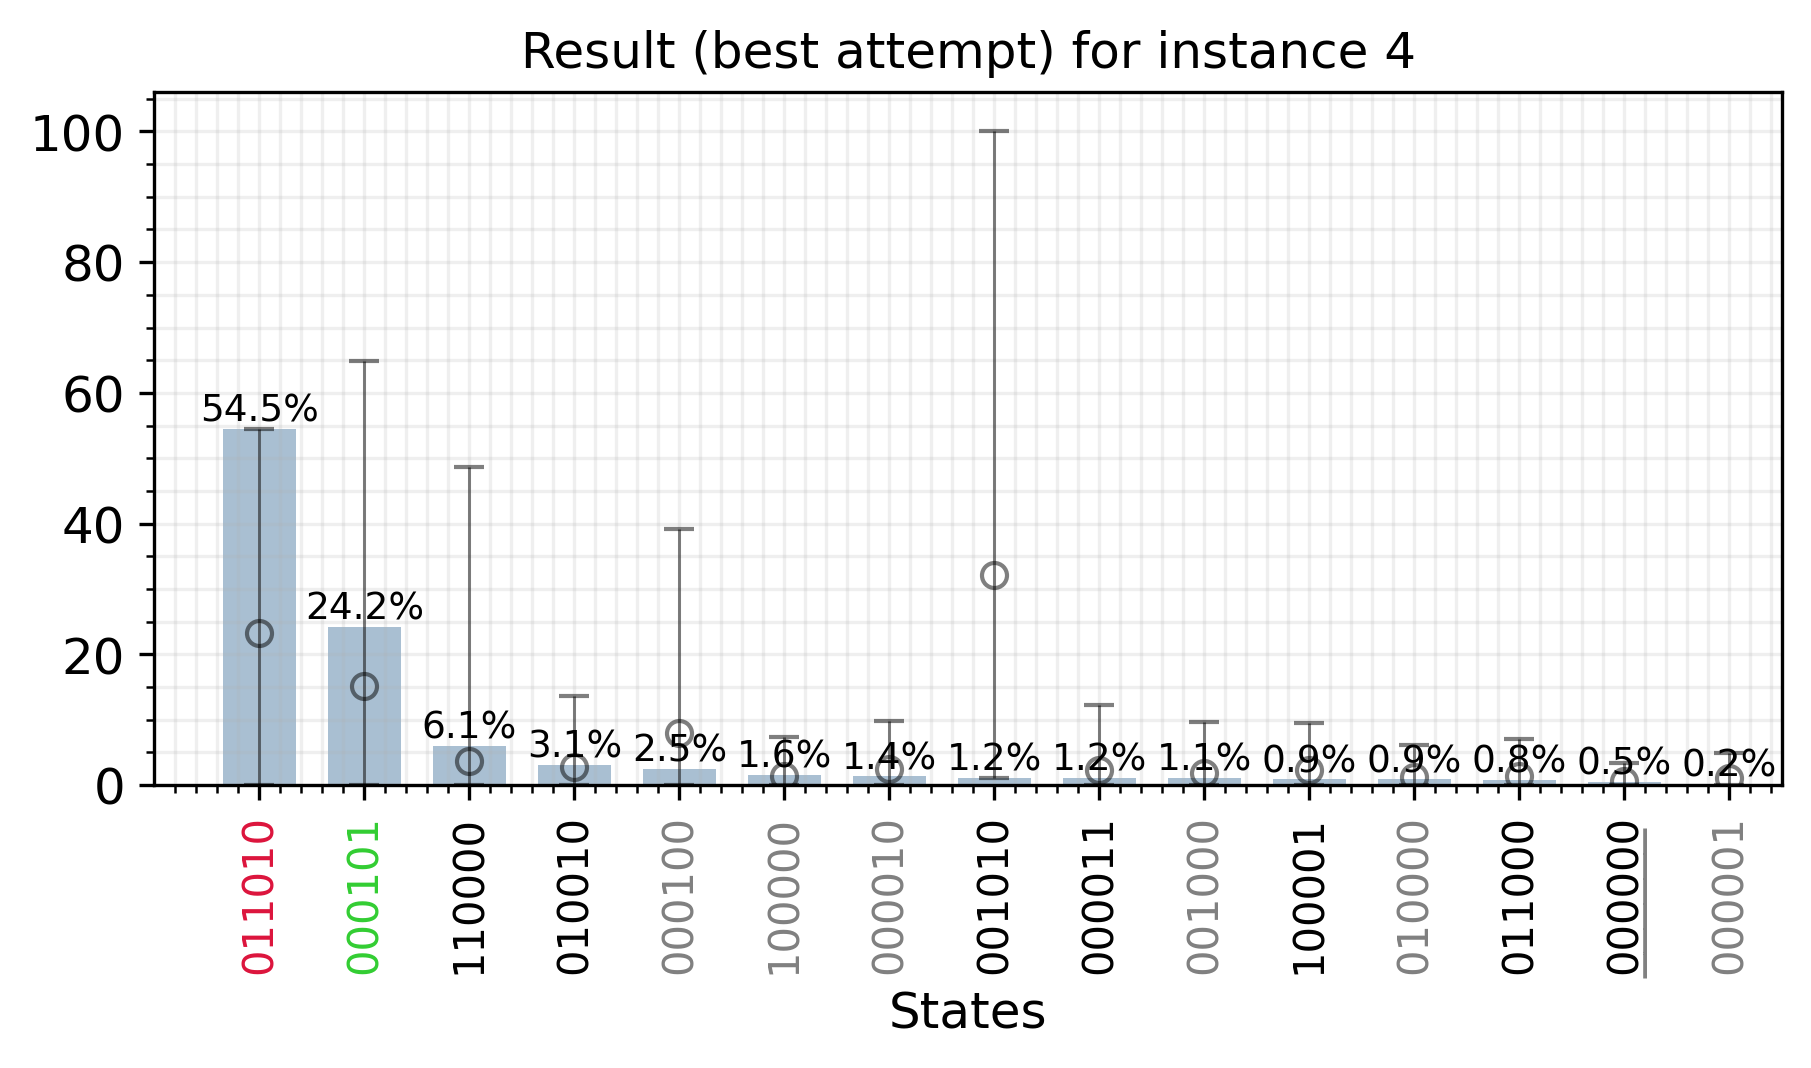

Result saved in:
random_parameters_2025-07-23@10h37m20s/dim6_mail4_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432].csv
random_parameters_2025-07-23@10h37m20s/dim6_mail4_all0_random_p4_50ra_k1.0_BOUNDS[0,2pi]x[-9.995976625058432,9.995976625058432]_pars0[0,2pi]x[-9.995976625058432,9.995976625058432]_data.txt

TOTAL ELAPSED TIME: 46.5228062470754 minutes.


In [11]:
current_datetime = datetime.now().strftime("%Y-%m-%d@%Hh%Mm%Ss")

# Create a  directory where to collect files
folder_path = f"random_parameters_{current_datetime}"
print(f"Saving in folder_path = {folder_path}")
os.makedirs(folder_path, exist_ok=True)

# Run QAOA+ for every instance.
for h, instance in zip(chosen_ks, chosen_instances):
    print(h, instance)
    print("*"*50)
    print(f"Instance {instance} with h = {h}\n")

    FILENAME_list = [] # list of .csv containing the final histograms data.
    DATA_FILENAME_list = [] # list of .txt containing metadata such as energies, betas, gammas.


    # Define the instance.
    U, subsets_dict = define_instance(n, instance, verbose=False)
    subsets = list(subsets_dict.values())
    _, _, _, _, EXACT_COVERS = find_spectrum(U, subsets_dict, n, h)
    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]

    print("U, subsets, EXACT_COVERS, MEC", U, subsets, EXACT_COVERS, MEC)

    # Plot states vs energy.
    show_spectrum(n, instance, h, fontsize=10)


    # Choose the initialization.
    if init_string == 'all1':
        # Only "1"-states.
        init_name = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')]

    elif init_string == 'all0':
        init_name = ["000000"]


    # Prepare the cost and mixing circuit.
    constant, hamiltonian, qc_cost = build_cost_circuit(n, instance, h, verbose=True)
    qc_mixing = build_mixing_circuit(n, instance,verbose=True)
    qc_initial, check_counts  = build_initialization_circuit(n, instance, init_name, verbose=True)

    # # Check that initialization was correct.
    # plot_histogram(check_counts, ax=plt.subplots()[1], title="Initialization check", color='k')
    # plt.show(block=False) # don't stop execution


    # Set initial angles.
    gamma_bound = find_gamma_bound(n, instance, h, verbose=True)

    beta_0 = (0, 2*np.pi)
    gamma_0 =  (-gamma_bound, gamma_bound)
    string_0 = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"

    bnds_beta = (0, 2*np.pi)
    bnds_gamma = (-gamma_bound, gamma_bound)
    bnds_string = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"


    # Build files' names.
    header = f"dim{n}_mail{instance}_{init_string}" \
           + f"_random_p{p}_{random_attempts}ra_k{h}" \
           + f"_BOUNDS{bnds_string}_pars0{string_0}"

    FILENAME = os.path.join(folder_path, header + f".csv")
    DATA_FILENAME = os.path.join(folder_path, header + f"_data.txt")

    FILENAME_list.append(FILENAME)
    DATA_FILENAME_list.append(DATA_FILENAME)


    # Record the details of each attempt in a file.
    with open(DATA_FILENAME, 'a') as DATA_FILE:
        write_params_on_file(DATA_FILE, params) # Write global parameters

        E_best = 100
        TOTAL_start_time = time.time()

        for attempt in range(1,random_attempts+1):
            print(f"\n---------- {attempt}/{random_attempts} random_attempts -----------\n")
            DATA_FILE.write(f"\n---------- {attempt}/{random_attempts} random_attempts -----------\n")

            # Build QAOAAnsatz.
            cost_vs_iteration = [] # to save (and plot) iterations
            ansatz = QAOAAnsatz(qc_cost,
                                mixer_operator=qc_mixing,
                                initial_state=qc_initial,
                                reps=p, name='QAOA+')


            # Generate a pass manager without providing a backend.
            pm = generate_preset_pass_manager(optimization_level=3)
            ansatz_isa = pm.run(ansatz)
            hamiltonian_isa = hamiltonian.apply_layout(ansatz_isa.layout)

            estimator = StatevectorEstimator()
            sampler = StatevectorSampler()


            # *************************  FIND OPTIMAL ANGLES  ***************************
            # *************************     THROUGH QAOA+     ***************************

            # Set initial angles and angles'bounds.
            pars_0 = [random.uniform(*beta_0) for _ in range(p)] + \
                     [random.uniform(*gamma_0) for _ in range(p)]
            bnds = [bnds_beta]*p + [bnds_gamma]*p

            print(f"pars_0 = {pars_0}")
            print(f"bnds = {bnds}\n")


            # Do the minimization.
            result = minimize(cost_func, # change cost_func -> cost_func_plot to plot iterations
                              pars_0, bounds=bnds,
                              args=(ansatz_isa, hamiltonian_isa, estimator),
                              method="Nelder-Mead",
                              options={"disp": True, "maxiter": 1200, "maxfev": 1200}, tol=1e-4)


            # Works only if you chose cost_func_plot.
            if cost_vs_iteration != []:
                plt.figure()
                plt.plot(cost_vs_iteration)
                plt.xlabel("Iteration")
                plt.ylabel("Cost")
                plt.show()


            # Minimum energy reached with minimization.
            E_min = result.fun + constant
            print(f"E_min = result.fun + constant = {E_min}")
            print(f"E_min = result.fun = {result.fun}")
            DATA_FILE.write(f"\nE_min = {E_min}")


            # Optimal parameters (betas, gammas) found.
            betas = list(result.x[:p])
            gammas = list(result.x[p:])
            print(f"\nOptimal parameters: betas, gammas = {betas}, {gammas}")
            DATA_FILE.write(f'\nE_min\'s parameters: betas = {betas}, gammas = {gammas}\n')


            # Update the best attempt.
            if E_min < E_best:
                    E_best = E_min
                    best_attempt = attempt
                    print("--> ***UPDATING THE BEST ATTEMPT***\n")
            else:
                print("--> ***NOT UPDATING THE BEST ATTEMPT***\n")


            # ****************************  RUN THE CIRCUIT  ******************************
            # ************************ WITH OPTIMAL PARAMETERS ****************************

            # Assign to the previously created ansatz the 2p parameters found.
            pars = betas + gammas
            qc = ansatz.assign_parameters(pars)
            qc.measure_all() # add a measurement

            # Run this circuit.
            qc_isa = pm.run(qc)
            output = sampler.run([qc_isa], shots=1024).result()
            samp_dist = output[0].data.meas.get_counts()


            # ****************************  POST PROCESS  **********************************
            # *********************** AND SAVE THE OUTPUT HISTOGRAM ************************

            # Create a dataframe from the sampling results.
            df = pd.DataFrame(samp_dist.items(), columns=['states', 'counts'])

            # Remove ancillary bits.
            num_ancillas = get_circuit_parameters(subsets, verbose=False)[2]
            df['states'] = df['states'].apply(lambda x: x[num_ancillas:])

            # Invert the bit order for the states (e.g., convert "01101" to "10110").
            df['states'] = df['states'].apply(lambda s: str(s)[::-1])  # Invertiamo l'ordine dei bit

            # After removing the ancillary bits, we aggregate counts by state.
            df = df.groupby(['states']).sum().reset_index()

            # Sort in decreasing order.
            df = df.sort_values('counts', ascending=False)

            # Rename the "counts" column to include attempt details.
            df.columns = ['states', f'counts_p{p}_{attempt}of{random_attempts}']

            # Merge the current attempt dataframe with previously built dataframes.
            if attempt == 1:
                df_all_attempts = df
            else:
                df_all_attempts = pd.merge(df_all_attempts, df, on="states", how="outer")
            
            print(df)


        # Save to .csv the global dataframe.
        df_all_attempts.to_csv(FILENAME, index=False)


        # Plot the best attempt (minimum energy), with error bars
        # representing other attempts in the global dataframe.
        plot_histogram_of_best_column(df_all_attempts,
                                      f'counts_p{p}_{best_attempt}of{random_attempts}',
                                      EXACT_COVERS, init_name,
                                      fontsize=12, title=f"Result (best attempt) for instance {instance}")


        DATA_FILE.write("\n*******************************")
        DATA_FILE.write(f"\nAttempt that reached the best result with E_min = {E_best} is #{best_attempt} ")
        DATA_FILE.write(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.\n")
        print(f"Result saved in:\n{FILENAME}\n{DATA_FILENAME}")
        print(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.")

## (Optional) Draw the latest instance QAOA circuit

Instance #4


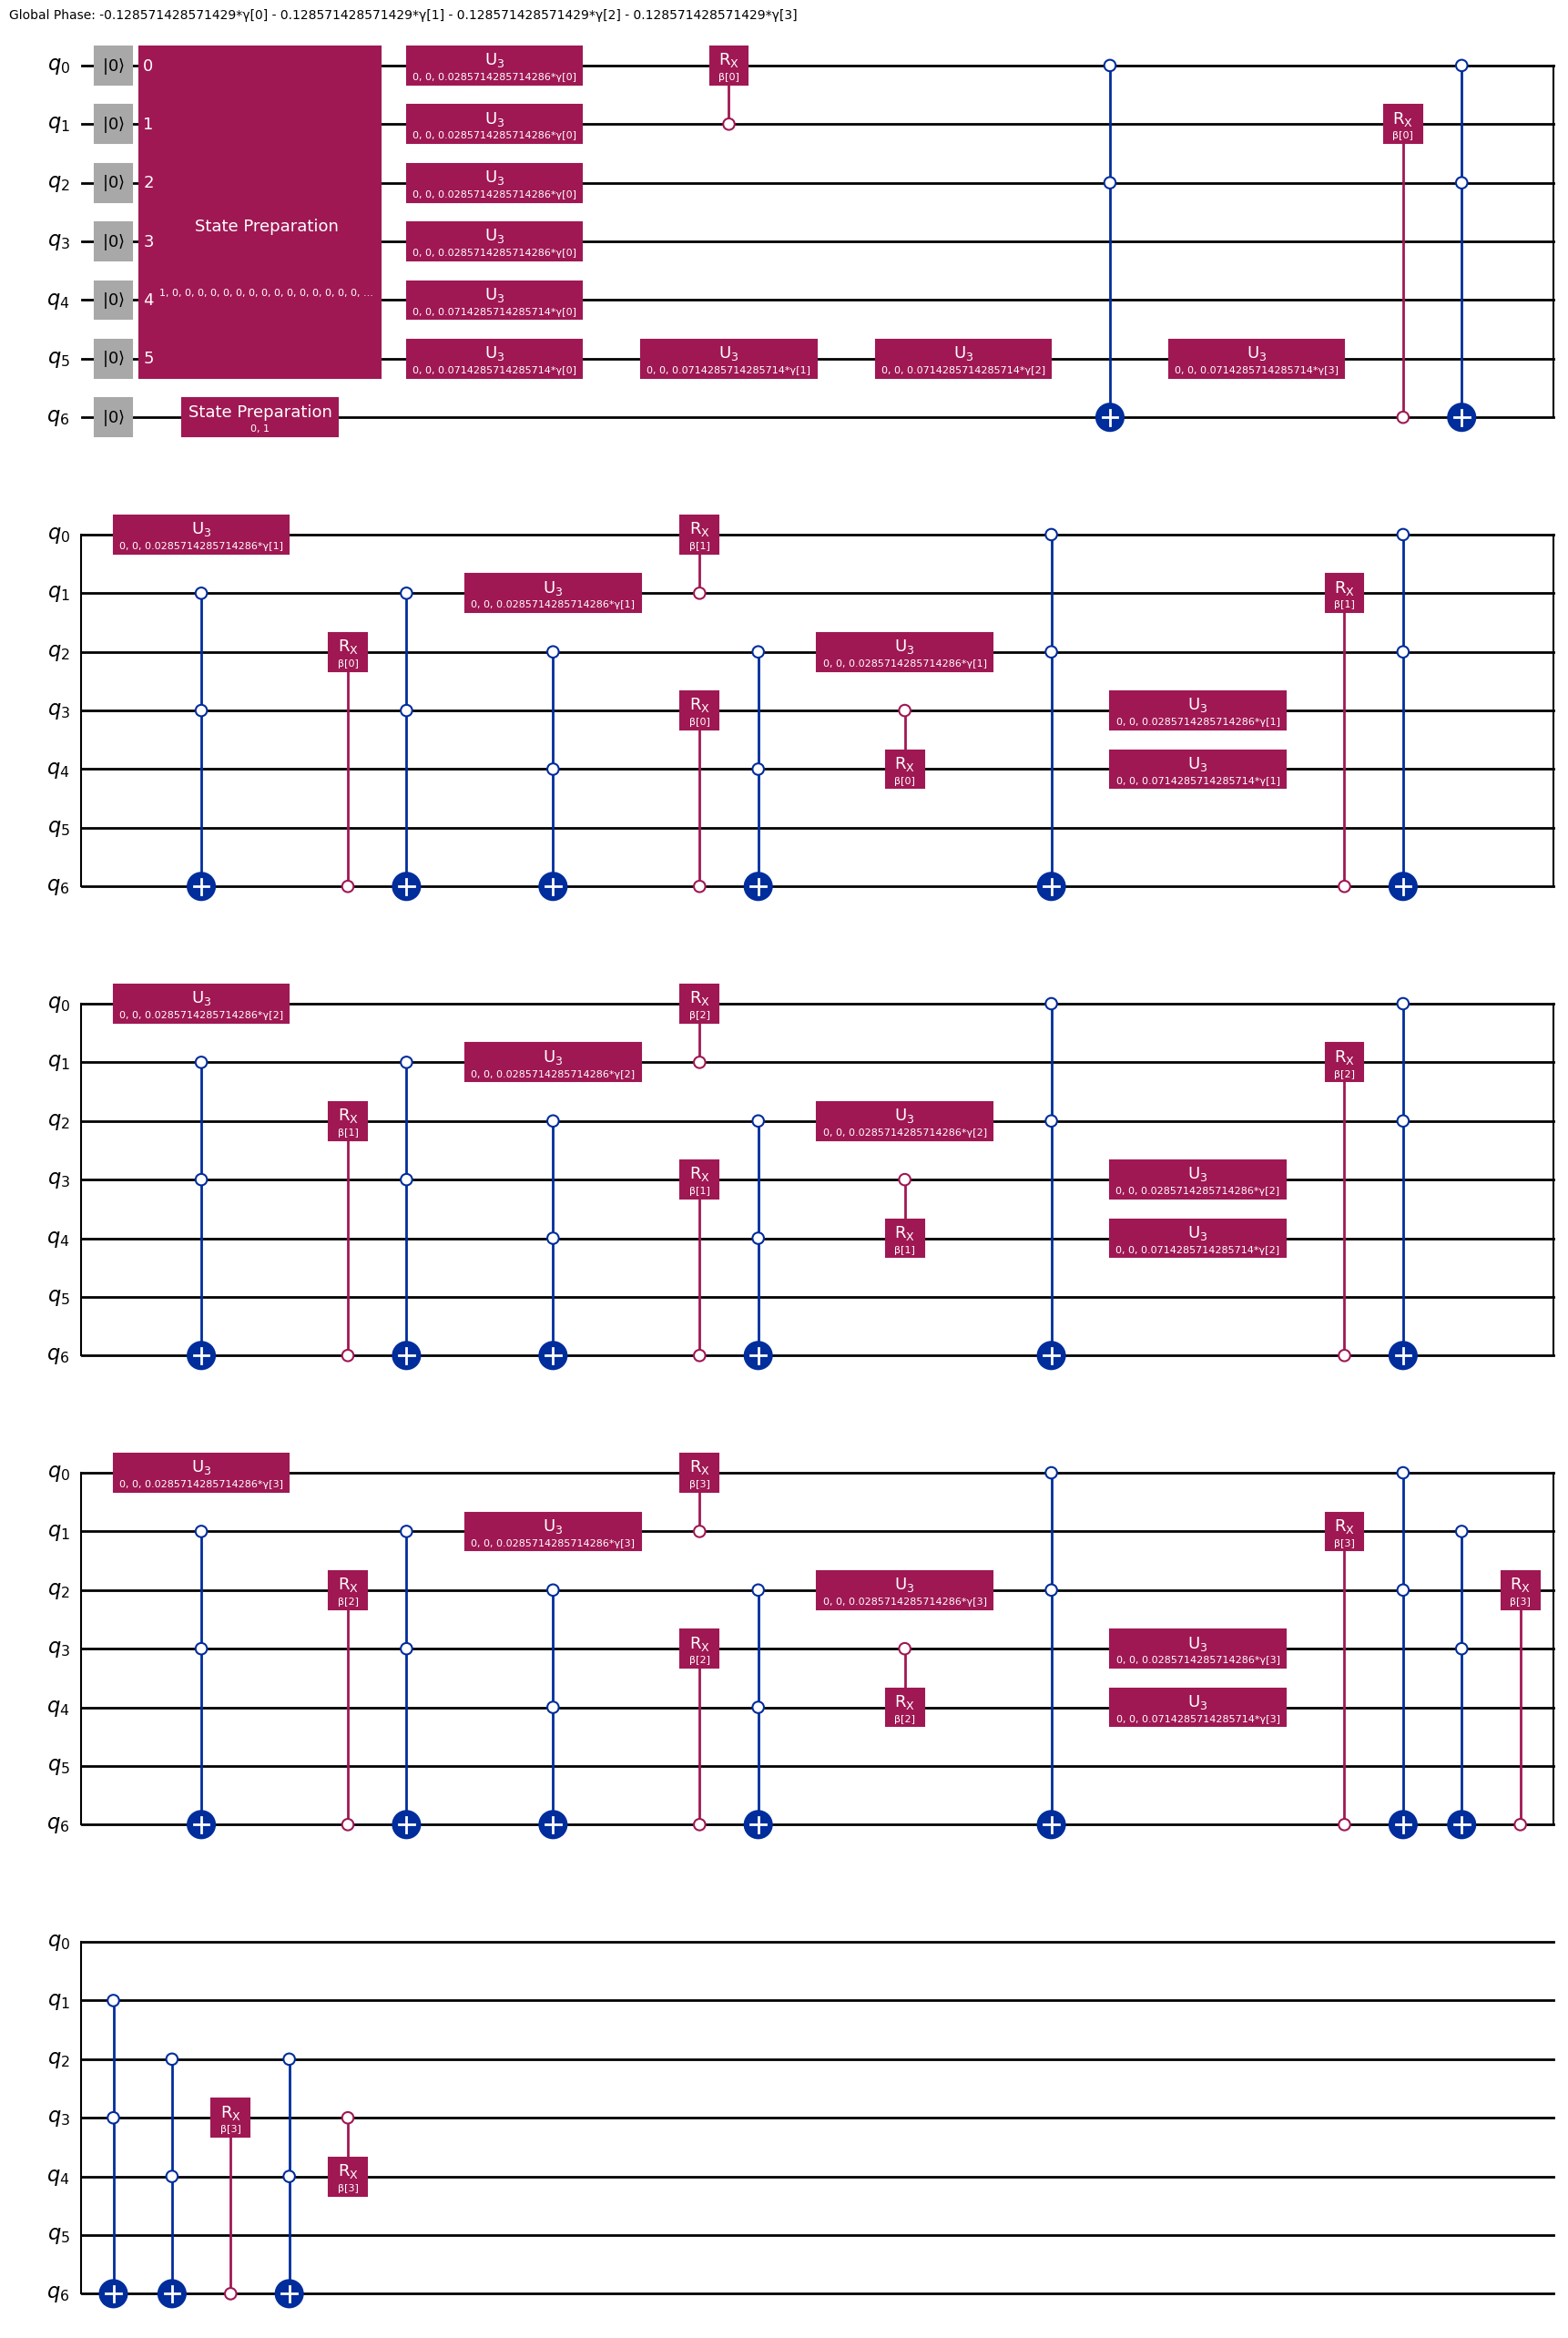

In [8]:
print(f"Instance #{instance}")
ansatz.decompose(reps=2).draw("mpl")

## Plot from a saved folder ...
### ... for each instance, the best attempt (with also mean and error displayed) or...
Plot the results of all chosen instances for which QAOA has been computed or plot results from a previous run.

The `find_files_containing_string` function will search for `.csv` and `.txt` files in the selected `path`. If provided, it will also search for files that contain a specific string of text.

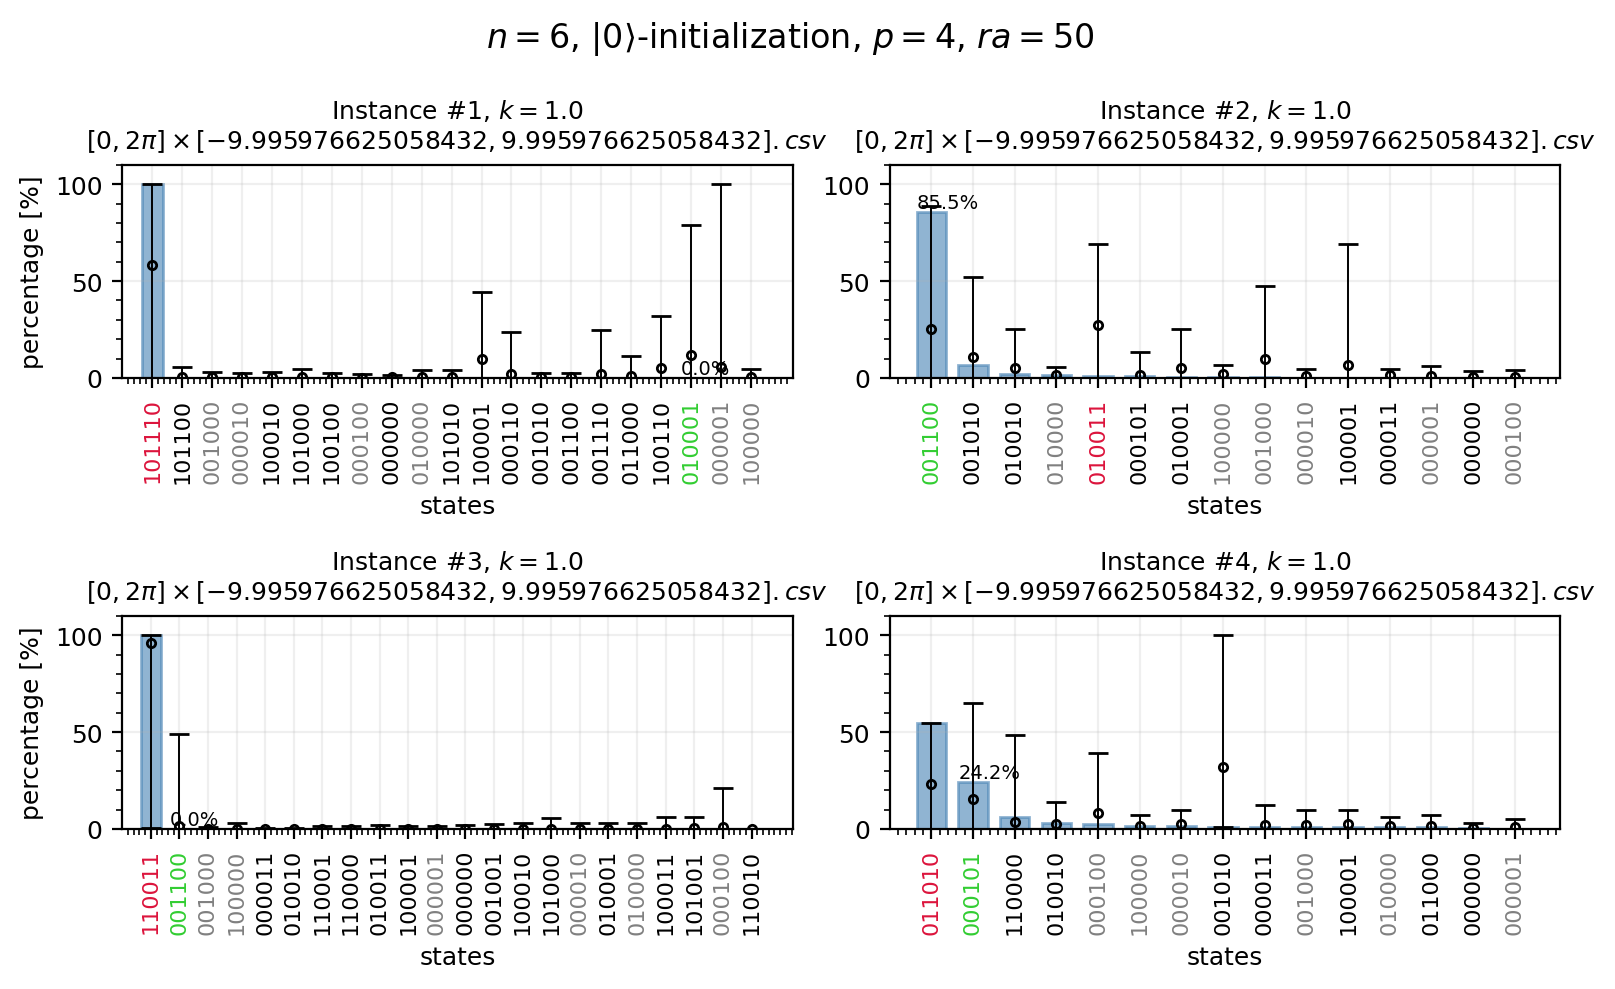

In [12]:
# Uncomment this line to plot data from an existing directory
# folder_path = "random_parameters_2025-07-21@17h20m50s" # LEC
# folder_path = "random_parameters_2025-07-22@15h10m16s" # LEC-1
# folder_path = "random_parameters_2025-06-06@17h36m57s"

# Find the files that contain every string in 'substrings'.
FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path= f"./{folder_path}/")

# Get the number of files collected.
num_files = len(FILENAME_list)

if num_files>1:
    plot_list_of_files(FILENAME_list, DATA_FILENAME_list,
                       colorchosen="steelblue", alpha=0.6,
                       init_name="all1",
                       dont_show_in_title=["i", "k"],
                       dont_show_in_titles=["n", "p", "ra", "init"],
                       figsize=(8,num_files+1),
                       dpi=200, N=9) # figsize=(10, 13), dpi=300, N=12 for latex figures
else:
    plot_file(FILENAME_list[0], DATA_FILENAME_list[0],
              colorchosen='indigo', alpha=0.4,
              dont_show_in_title = [],
              figsize=(10,4), dpi=200, N=10)

### ... for each instance, every single attempt

In [ ]:
# folder_path = "random_parameters_2025-01-30@09h03m50s"
plot_each_attempt_from_folder(folder_path)

In [6]:
print(info_dim6)


{1: {'exact_covers': ['011110', '101111'], 'mec': '011110', 'subsets': [{8, 11}, {8, 11, 4, 12}, {10, 3}, {9, 2, 5, 7}, {1, 6}, {4, 12}]}, 2: {'exact_covers': ['001101', '111011'], 'mec': '001101', 'subsets': [{1, 5}, {4, 6}, {10, 7}, {1, 2, 4, 5, 6, 12}, {2, 12}, {8, 9, 3, 11}]}, 3: {'exact_covers': ['100111', '111011'], 'mec': '100111', 'subsets': [{12, 6}, {8, 1, 10, 4}, {3, 7}, {1, 3, 4, 7, 8, 10}, {9, 5}, {2, 11}]}, 4: {'exact_covers': ['001110', '111101'], 'mec': '001110', 'subsets': [{8, 1}, {12, 5}, {10, 7}, {2, 3, 4, 6}, {1, 5, 8, 9, 11, 12}, {9, 11}]}, 5: {'exact_covers': ['110001', '011111'], 'mec': '110001', 'subsets': [{1, 3, 5, 7, 8, 10}, {11, 4}, {5, 7}, {8, 3}, {1, 10}, {9, 2, 12, 6}]}, 6: {'exact_covers': ['001111', '111101'], 'mec': '001111', 'subsets': [{2, 10}, {9, 11, 4, 5}, {3, 12}, {1, 6}, {2, 4, 5, 9, 10, 11}, {8, 7}]}, 7: {'exact_covers': ['101001', '011111'], 'mec': '101001', 'subsets': [{1, 2, 7, 10, 11, 12}, {10, 12}, {3, 4}, {1, 2}, {11, 7}, {8, 9, 5, 6}]},